In [1]:
from yugiquery import *
header('Cards')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Cards - Execution started 16/01/2023 17:31 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Merge data](#Merge-data)
    *   [1.3  Save data](#Save-data)
*   [3  Check changes](#Check-changes)
    *   [3.1  Load previous data](#Load-previous-data)
    *   [3.2  Generate changelog](#Generate-changelog)
*   [4  Data visualization](#Data-visualization)
    *   [4.1  Full data](#Full-data)
    *   [4.2  Card types](#Card-types)
    *   [4.3  Monsters](#Monsters)
        *   [4.3.1  Attributes](#Attributes)
        *   [4.3.2  Primary types](#Primary-types)
            *   [4.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [4.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [4.3.2.3  By attribute](#By-attribute)
        *   [4.3.3  Secondary types](#Secondary-types)
            *   [4.3.3.1  By attribute](#By-attribute)
            *   [4.3.3.2  By secondary type](#By-secondary-type)
        *   [4.3.4  Monster types](#Monster-types)
            *   [4.3.4.1  By Attribute](#By-Attribute)
            *   [4.3.4.2  By primary type](#By-primary-type)
            *   [4.3.4.3  By secondary type](#By-secondary-type)
        *   [4.3.5  Effect type](#Effect-type)
        *   [4.3.6  ATK](#ATK)
        *   [4.3.7  DEF](#DEF)
        *   [4.3.8  Level/Rank](#Level/Rank)
            *   [4.3.8.1  ATK statistics](#ATK-statistics)
            *   [4.3.8.2  DEF statistics](#DEF-statistics)
        *   [4.3.9  Pendulum scale](#Pendulum-scale)
            *   [4.3.9.1  ATK statistics](#ATK-statistics)
            *   [4.3.9.2  DEF statistics](#DEF-statistics)
            *   [4.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [4.3.10  Link](#Link)
            *   [4.3.10.1  ATK statistics](#ATK-statistics)
        *   [4.3.11  Link Arrows](#Link-Arrows)
            *   [4.3.11.1  By combination](#By-combination)
            *   [4.3.11.2  By unique](#By-unique)
            *   [4.3.11.3  By link](#By-link)
    *   [4.4  Spell & Trap](#Spell-&-Trap)
        *   [4.4.1  Properties](#Properties)
        *   [4.4.2  Effect type](#Effect-type)
            *   [4.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [4.5  Archseries](#Archseries)
        *   [4.5.1  By card type](#By-card-type)
        *   [4.5.2  By primary type](#By-primary-type)
        *   [4.5.3  By secondary type](#By-secondary-type)
        *   [4.5.4  By monster type](#By-monster-type)
        *   [4.5.5  By property](#By-property)
    *   [4.6  Artworks](#Artworks)
        *   [4.6.1  By card type](#By-card-type)
        *   [4.6.2  By primary type](#By-primary-type)
    *   [4.7  Errata](#Errata)
        *   [4.7.1  By card type](#By-card-type)
        *   [4.7.2  By primary type](#By-primary-type)
        *   [4.7.3  By artwork](#By-artwork)
    *   [4.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [4.8.1  TGC status](#TGC-status)
            *   [4.8.1.1  By card type](#By-card-type)
            *   [4.8.1.2  By monster type](#By-monster-type)
            *   [4.8.1.3  By archseries](#By-archseries)
        *   [4.8.2  OCG status](#OCG-status)
            *   [4.8.2.1  By card type](#By-card-type)
            *   [4.8.2.2  By monster type](#By-monster-type)
            *   [4.8.2.3  By archseries](#By-archseries)
        *   [4.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [5  Extras](#Extras)
    *   [5.1 Not yet released](#Not-yet-released)
*   [6  Epilogue](#Epilogue)
    *   [6.1  HTML export](#HTML-export)
<!-- *   [6.2  Git](#Git) -->

# Data aquisition

## Fetch online data

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

# Queries
monster_query = card_query(_property = False)
st_query = card_query(_primary = False, _secondary = False, _attribute = False, _monster_type = False, _stars = False, _atk = False, _def = False, _scale = False, _link = False, _arrows = False)

# Fetch Monster
monster_df = fetch_monster(monster_query)

# Fetch Spell
spell_df = fetch_st(st_query, 'Spell')

# Fetch Trap
trap_df = fetch_st(st_query, 'Trap')

# Fetch errata
errata_df = fetch_errata()

  0%|          | 0/7 [00:00<?, ?attribute/s]

8047 results

2394 results

1823 results

532 results

719 results



## Merge data

In [3]:
# Merge errata
monster_df = merge_errata(monster_df, errata_df, drop=True)
spell_df = merge_errata(spell_df, errata_df, drop=True)
trap_df = merge_errata(trap_df, errata_df, drop=True)

# Combine data frames
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)
full_df = pd.concat([st_df, monster_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)
print('Data merged')

Data merged


## Save data

In [4]:
full_df.to_csv(f'../Data/All_cards_{int(timestamp.timestamp())}.csv', index = False)
print('Data saved')

Data saved


# Check changes

## Load previous data

In [5]:
# Get list of files
files_list = sorted(glob.glob('../Data/All_cards_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if len(files_list)>1:
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(files_list[1], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Effect type'] = previous_df['Effect type'].dropna().apply(literal_eval)
    previous_df['Link Arrows'] = previous_df['Link Arrows'].dropna().apply(literal_eval)
    previous_df['Archseries'] = previous_df['Archseries'].dropna().apply(literal_eval)
    previous_df['Artwork'] = previous_df['Artwork'].dropna().apply(literal_eval)
    previous_df['Errata'] = previous_df['Errata'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(full_df.dtypes.to_dict())
    print('File loaded')
else:
    previous_df = None
    print('No older files')

File loaded


## Generate changelog

In [6]:
if previous_df is None:
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, full_df, col = 'Name')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../Data/Cards_changelog_{timestamp.strftime("%Y%m%d")}.csv', index = False)
        print('Changelog saved')

No changes


# Data visualization

## Full data

In [7]:
full_df

,Name,Password,Card type,Property,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,...,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows
0,"""A"" Cell Breeding Device",34541863,Spell Card,Continuous Spell Card,"(Trigger Effect,)",NaN,Unlimited,Unlimited,"""A"" Cell Breeding Device",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""A"" Cell Incubator",64163367,Spell Card,Continuous Spell Card,"(Continuous-like Effect, Trigger Effect)",NaN,Unlimited,Unlimited,"""A"" Cell Incubator",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""A"" Cell Recombination Device",91231901,Spell Card,Quick-Play Spell Card,"(Effect, Ignition-like Effect)",NaN,Unlimited,Unlimited,"""A"" Cell Recombination Device",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""A"" Cell Scatter Burst",73262676,Spell Card,Quick-Play Spell Card,"(Effect,)",NaN,Unlimited,Unlimited,"""A"" Cell Scatter Burst",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""Infernoble Arms - Durendal""",37478723,Spell Card,Equip Spell Card,"(Condition, Ignition-like Effect, Trigger Effect)","(Noble Arms,)",Unlimited,Unlimited,"""Infernoble Arms - Durendal""",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12259,Zubaba Knight,97896503,Monster Card,NaN,"(Trigger Effect,)","(Zubaba,)",Unlimited,Unlimited,Zubaba Knight,NaN,...,Effect Monster,NaN,EARTH,Warrior,3,1600,900,NaN,NaN,NaN
12260,Zubababancho Gagagacoat,23720856,Monster Card,NaN,"(Condition, Ignition Effect)","(Gagaga, Zubaba)",Unlimited,Unlimited,Zubababancho Gagagacoat,NaN,...,Effect Monster,NaN,EARTH,Warrior,4,1800,100,NaN,NaN,NaN
12261,Zuijin of the Ice Barrier,43256007,Monster Card,NaN,"(Condition, Ignition Effect)","(Ice Barrier,)",Unlimited,Unlimited,Zuijin of the Ice Barrier,NaN,...,Effect Monster,NaN,WATER,Warrior,2,500,300,NaN,NaN,NaN
12262,"Zure, Knight of Dark World",07459013,Monster Card,NaN,NaN,"(Dark World,)",Unlimited,Unlimited,"Zure, Knight of Dark World",NaN,...,Normal Monster,NaN,DARK,Fiend,4,1800,1500,NaN,NaN,NaN


Full data available to download [here](../Data)

## Card types

In [8]:
full_df.groupby('Card type').nunique()

,Name,Password,Property,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,...,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows
Card type,,,,,,,,,,,,,,,,,,,,,
Monster Card,8039,7954,0,224,1001,7,7,8047,3,7982,...,8,6,7,25,15,82,77,13,6,62
Spell Card,2392,2383,6,116,398,6,5,2394,3,2372,...,0,0,0,0,0,0,0,0,0,0
Trap Card,1823,1811,3,95,325,6,4,1823,2,1816,...,0,0,0,0,0,0,0,0,0,0


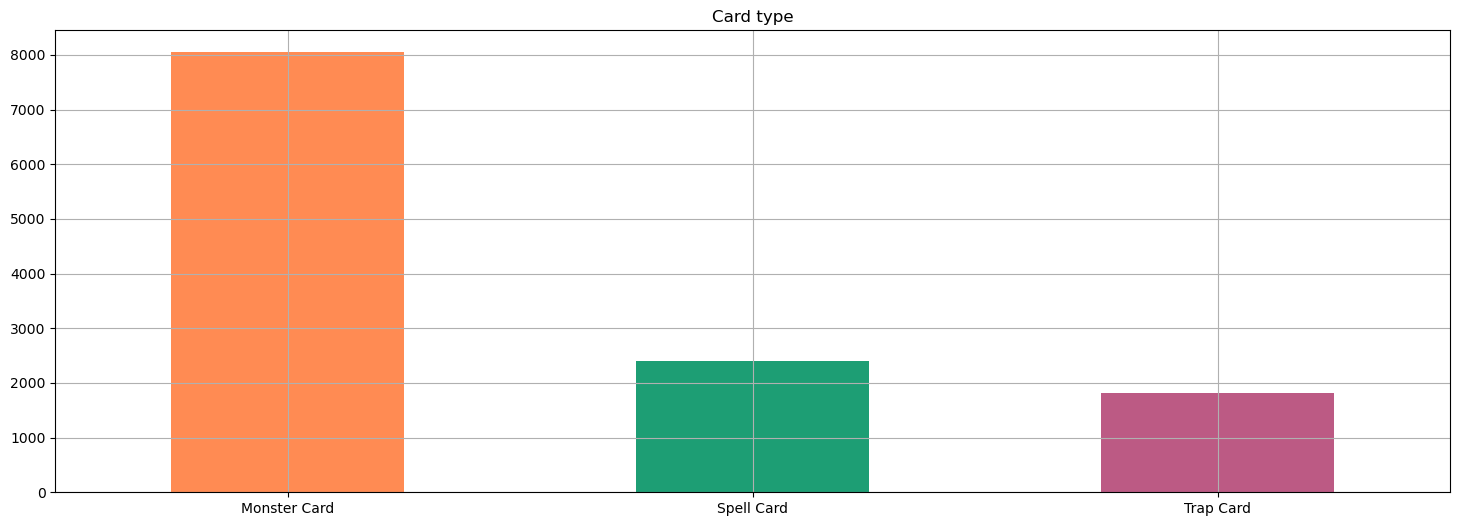

In [9]:
card_type_colors = [colors_dict[i] for i in full_df['Card type'].value_counts().index]
full_df['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

## Monsters

### Attributes

In [10]:
print('Total number of attributes:', monster_df['Attribute'].nunique())

Total number of attributes: 7


In [11]:
monster_df.drop(columns=['Card type']).groupby('Attribute').nunique()

,Name,Password,Primary type,Secondary type,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Attribute,,,,,,,,,,,,,,,,,,,
DARK,2233,2211,7,6,23,14,70,63,12,6,42,155,455,7,6,2236,3,2229,3
DIVINE,6,0,1,0,2,2,3,3,0,0,0,6,3,2,2,9,1,9,3
EARTH,1885,1872,7,6,23,12,71,60,12,4,29,128,331,6,6,1887,3,1880,3
FIRE,669,667,8,6,22,12,43,40,8,4,22,85,186,4,5,669,3,666,3
LIGHT,1639,1609,7,6,23,14,58,50,10,5,30,132,390,6,6,1639,3,1632,3
WATER,839,834,7,6,22,11,56,41,9,4,16,93,206,6,6,839,3,839,3
WIND,768,761,7,6,23,12,46,38,11,4,14,105,215,7,7,768,3,765,3


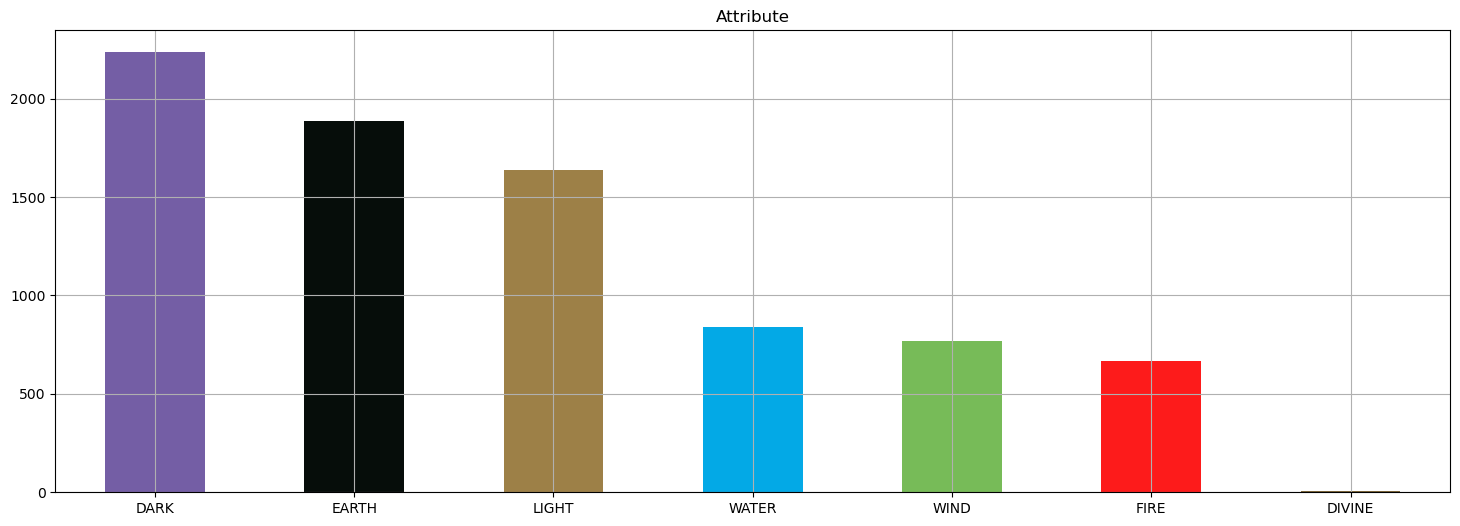

In [12]:
attribute_colors = [colors_dict[i] for i in monster_df['Attribute'].value_counts().index]
monster_df['Attribute'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = attribute_colors, title = 'Attribute')
plt.show()

### Primary types

In [13]:
print('Total number of primary types:', monster_df['Primary type'].nunique())

Total number of primary types: 8


In [14]:
monster_df.drop(columns=['Card type']).groupby('Primary type').nunique()

,Name,Password,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Primary type,,,,,,,,,,,,,,,,,,,
Effect Monster,5458,5430,6,7,25,12,73,66,13,0,0,204,781,6,6,5458,3,5424,3
Fusion Monster,433,432,1,6,23,12,48,46,4,0,0,68,140,4,4,433,3,431,3
Link Monster,373,367,0,6,23,0,39,0,0,6,62,52,138,5,5,373,3,370,2
Monster Token,1,0,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0
Normal Monster,746,702,1,6,23,10,59,49,10,0,0,6,129,4,5,747,3,747,3
Ritual Monster,120,120,3,6,15,12,33,26,1,0,0,33,37,2,1,120,1,120,3
Synchro Monster,417,415,1,6,23,13,40,38,4,0,0,56,159,5,4,417,2,416,3
Xyz Monster,495,488,0,6,23,14,51,42,5,0,0,69,193,6,4,495,2,490,2


#### Has effect discrimination

In [15]:
has_effect = monster_df['Primary type'].where(monster_df['Effect type'].notna()).value_counts().rename('Effect')
no_effect = monster_df['Primary type'].where(monster_df['Effect type'].isna()).value_counts().rename('No Effect')
effect = pd.concat([has_effect,no_effect], axis=1).fillna(0).astype(int)
effect

,Effect,No Effect
Effect Monster,5458,0
Xyz Monster,493,2
Synchro Monster,414,3
Fusion Monster,372,61
Link Monster,368,5
Ritual Monster,105,15
Normal Monster,34,713
Monster Token,0,1


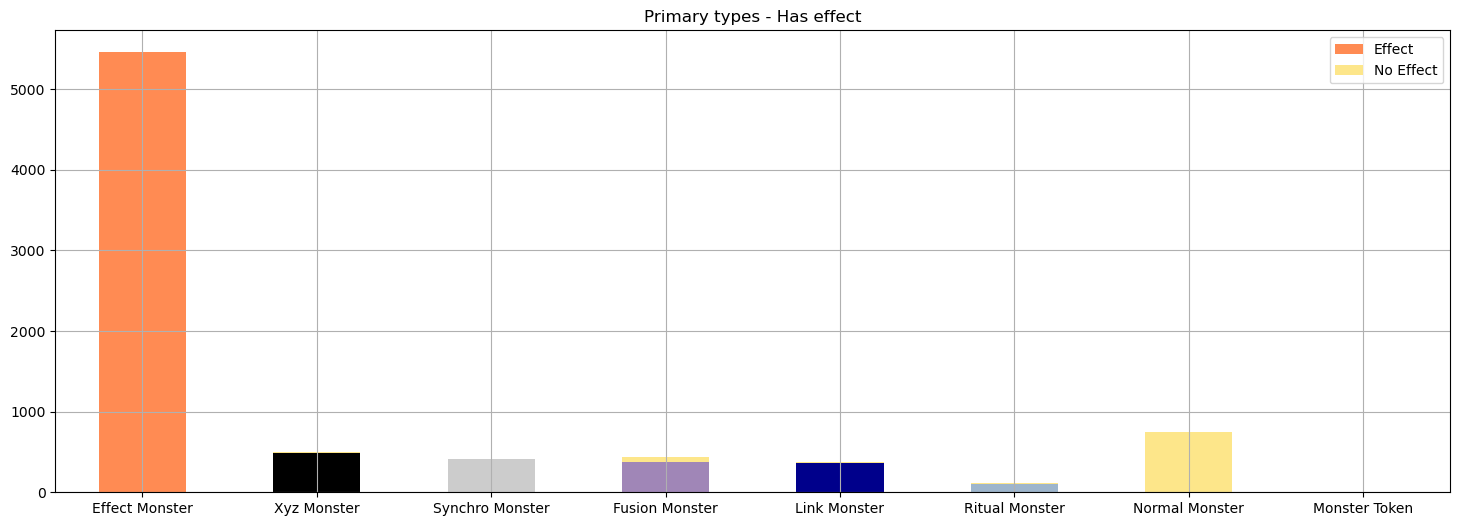

In [16]:
monster_type_colors = {'No Effect': colors_dict['Normal Monster'], 'Effect': [colors_dict[i] for i in effect.index]}
effect.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0,  legend=True, color = monster_type_colors, title = 'Primary types - Has effect')
# plt.yscale('log')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [17]:
not_pendulum = monster_df['Primary type'].where(monster_df['Pendulum Scale'].isna()).value_counts().rename('Not Pendulum')
is_pendulum = monster_df['Primary type'].where(monster_df['Pendulum Scale'].notna()).value_counts().rename('Pendulum')
pendulum = pd.concat([not_pendulum,is_pendulum], axis=1).fillna(0).astype(int)
pendulum

,Not Pendulum,Pendulum
Effect Monster,5190,268
Normal Monster,709,38
Xyz Monster,486,9
Fusion Monster,423,10
Synchro Monster,410,7
Link Monster,373,0
Ritual Monster,119,1
Monster Token,1,0


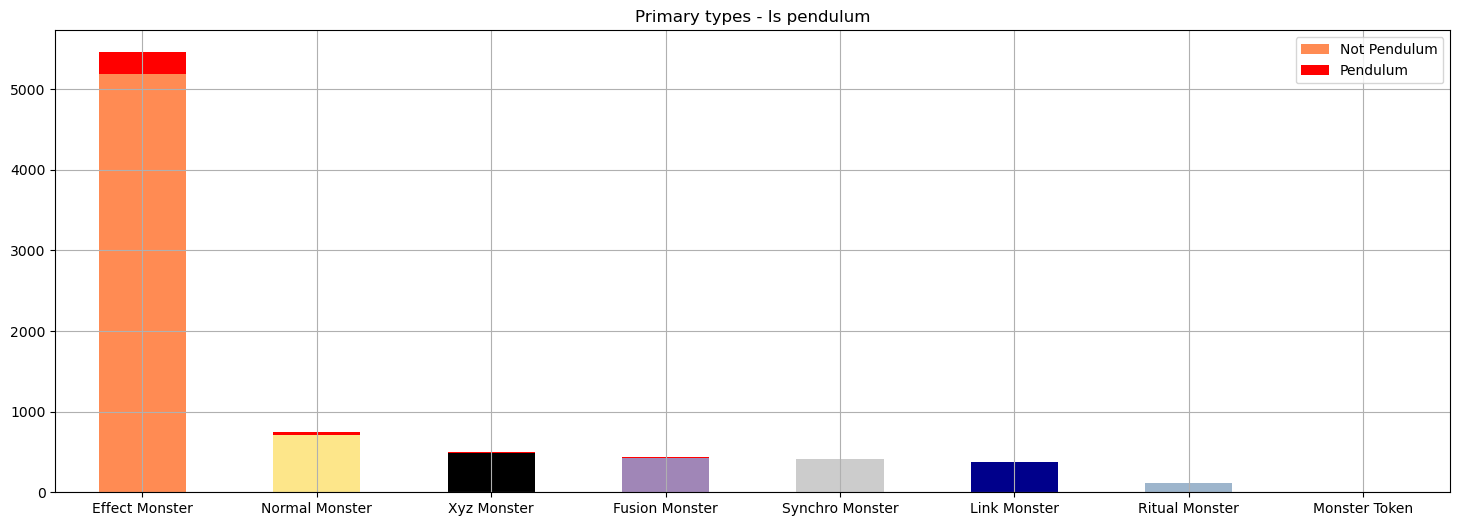

In [18]:
monster_type_colors_b = {'Pendulum': colors_dict['Pendulum Monster'], 'Not Pendulum': [colors_dict[i] for i in pendulum.index]}
pendulum.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = monster_type_colors_b, legend=True, title = 'Primary types - Is pendulum')
plt.show()

#### By attribute

In [19]:
primmary_crosstab = pd.crosstab(full_df['Primary type'],full_df['Attribute'])
primmary_crosstab

Attribute,DARK,DIVINE,EARTH,FIRE,LIGHT,WATER,WIND
Primary type,,,,,,,
Effect Monster,1496,6,1310,454,1105,554,533
Fusion Monster,150,0,81,34,99,35,34
Link Monster,123,0,76,33,87,29,25
Monster Token,0,0,0,1,0,0,0
Normal Monster,186,0,250,52,83,109,67
Ritual Monster,36,0,17,7,34,20,6
Synchro Monster,110,0,70,50,77,36,74
Xyz Monster,135,0,83,38,154,56,29


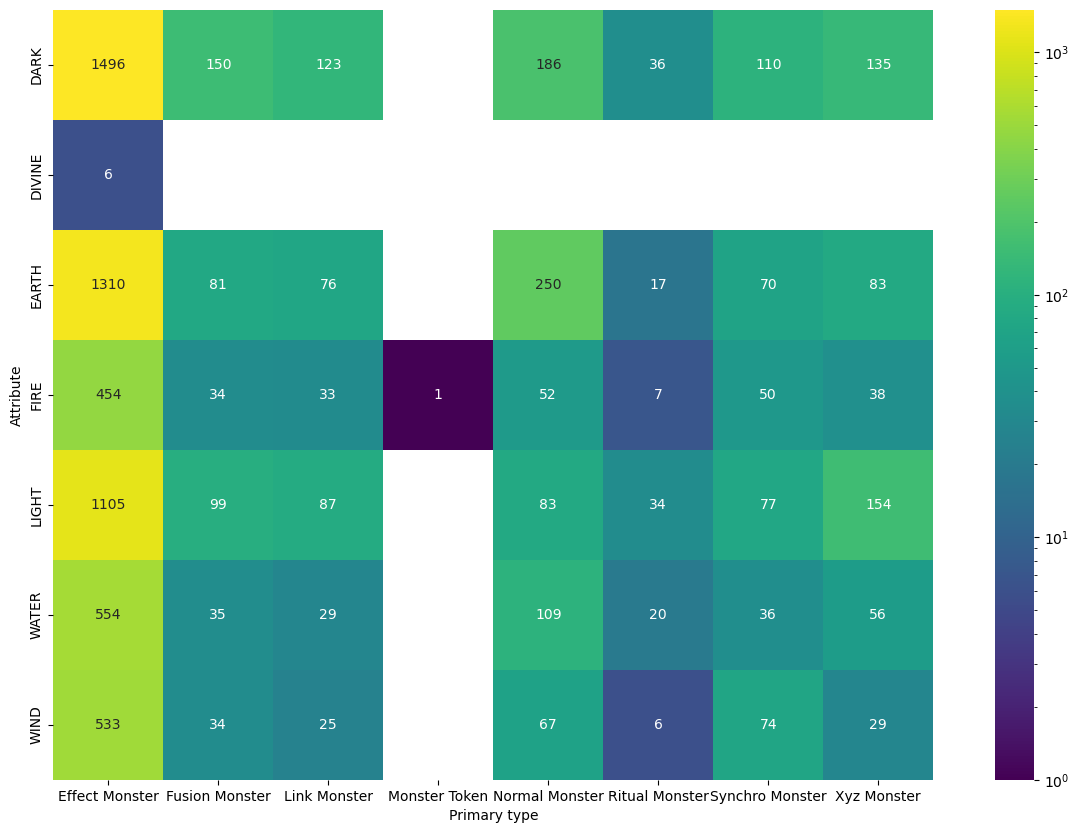

In [20]:
plt.figure(figsize = (16,10))
sns.heatmap(primmary_crosstab.T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Secondary types

In [21]:
print('Total number of secondary types:', monster_df['Secondary type'].nunique())

Total number of secondary types: 6


In [22]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Secondary type').nunique()

,Name,Password,Primary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Secondary type,,,,,,,,,,,,,,,,,
Flip monster,185,184,2,6,19,12,38,33,1,20,46,3,4,185,1,185,3
Gemini monster,45,45,1,6,18,8,17,19,0,6,13,1,1,45,0,45,3
Spirit monster,39,39,2,6,13,10,22,20,2,8,4,2,2,39,1,39,1
Toon monster,17,17,1,6,7,5,12,15,0,8,13,1,2,17,1,17,2
Tuner monster,480,479,5,6,23,9,32,32,7,59,137,4,3,480,3,480,3
Union monster,37,37,1,6,9,8,17,14,0,6,9,1,1,37,1,37,2


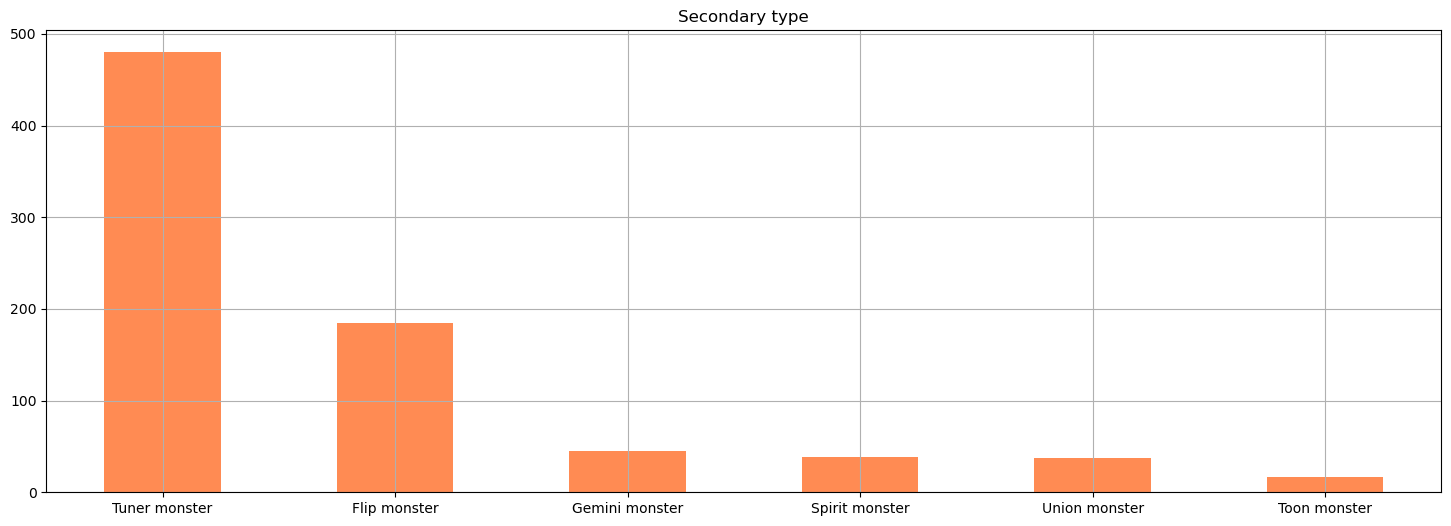

In [23]:
secondary_type_colors = colors_dict['Effect Monster']
monster_df['Secondary type'].value_counts().plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = secondary_type_colors, legend=False, title = 'Secondary type')
plt.show()

#### By attribute

In [24]:
secondary_crosstab = pd.crosstab(full_df['Secondary type'],full_df['Attribute'])
secondary_crosstab

Attribute,DARK,EARTH,FIRE,LIGHT,WATER,WIND
Secondary type,,,,,,
Flip monster,51,62,10,32,13,17
Gemini monster,11,8,8,6,8,4
Spirit monster,5,6,6,5,6,11
Toon monster,7,5,1,2,1,1
Tuner monster,124,93,43,97,53,70
Union monster,6,9,3,12,4,3


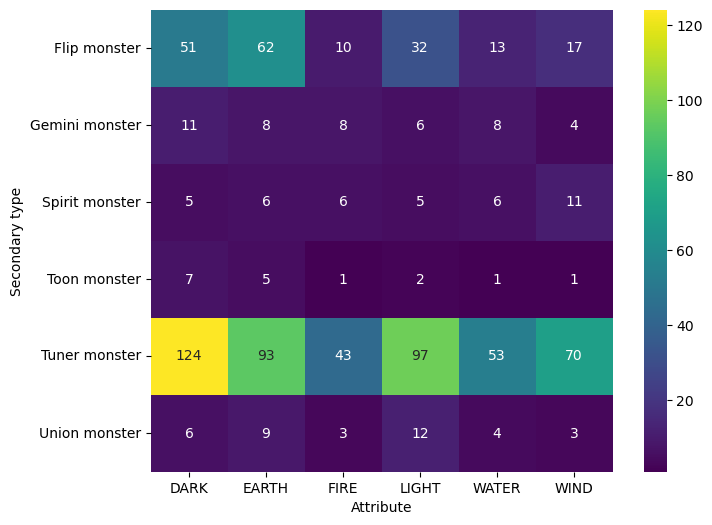

In [25]:
plt.figure(figsize = (8,6))
sns.heatmap(secondary_crosstab[secondary_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True)
plt.show()

#### By secondary type

In [26]:
secondary_crosstab_b = pd.crosstab(full_df['Primary type'],full_df['Secondary type'], margins = True)
secondary_crosstab_b

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster,All
Primary type,,,,,,,
Effect Monster,184,45,37,17,433,37,753
Fusion Monster,0,0,0,0,3,0,3
Normal Monster,0,0,0,0,12,0,12
Ritual Monster,1,0,2,0,2,0,5
Synchro Monster,0,0,0,0,30,0,30
All,185,45,39,17,480,37,803


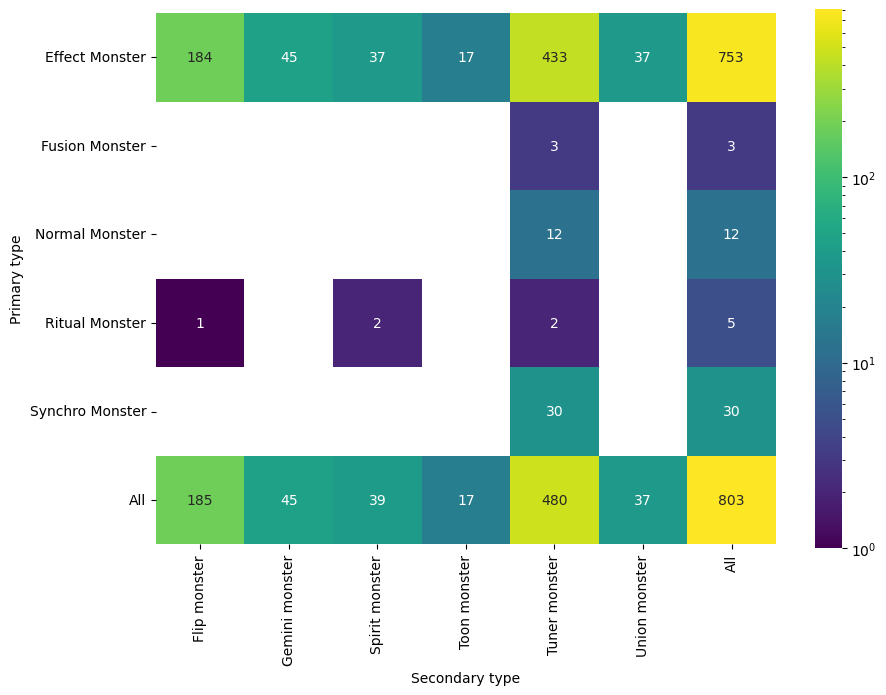

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(secondary_crosstab_b, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Monster types

In [28]:
print('Total number of monster types:', monster_df['Monster type'].nunique())

Total number of monster types: 25


In [29]:
monster_df.drop(columns=['Card type']).groupby('Monster type').nunique()

,Name,Password,Primary type,Secondary type,Attribute,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Monster type,,,,,,,,,,,,,,,,,,,
Aqua,256,254,7,6,6,10,50,33,3,2,3,51,65,4,5,256,1,256,3
Beast,378,371,7,4,6,10,48,38,7,2,7,60,85,4,4,379,2,379,3
Beast-Warrior,238,234,7,3,6,10,36,29,6,3,7,57,47,4,5,238,2,237,3
Creator God,1,0,1,0,1,1,1,1,0,0,0,1,1,0,1,1,0,1,0
Cyberse,256,254,7,1,6,11,30,29,1,6,39,45,36,5,4,256,3,256,2
Dinosaur,122,121,6,1,6,10,35,30,4,2,3,35,25,3,3,122,1,122,2
Divine-Beast,5,0,1,0,1,1,3,3,0,0,0,5,2,2,2,8,1,8,3
Dragon,661,657,7,6,6,13,52,48,9,5,19,108,186,6,6,661,3,659,3
Fairy,519,511,7,5,6,12,43,38,9,4,12,82,115,6,5,519,3,514,3


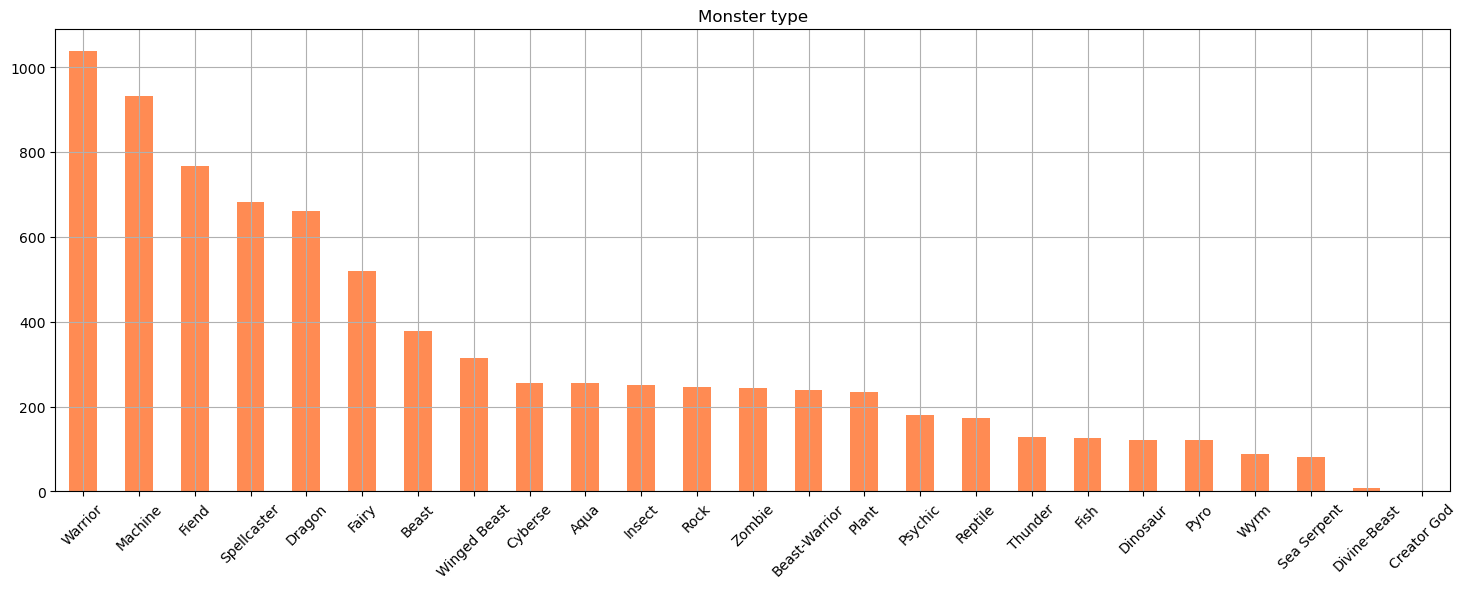

In [30]:
monster_type_colors = colors_dict['Monster Card']
monster_df['Monster type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = monster_type_colors, title = 'Monster type')
plt.show()

#### By Attribute

In [31]:
monster_crosstab = pd.crosstab(full_df['Monster type'],full_df['Attribute'], dropna=False)
monster_crosstab

Attribute,DARK,DIVINE,EARTH,FIRE,LIGHT,WATER,WIND
Monster type,,,,,,,
Aqua,9,0,6,10,4,221,6
Beast,37,0,213,16,74,14,25
Beast-Warrior,37,0,83,54,33,16,15
Creator God,0,1,0,0,0,0,0
Cyberse,71,0,37,44,63,28,13
Dinosaur,11,0,60,32,5,8,6
Divine-Beast,0,8,0,0,0,0,0
Dragon,256,0,47,48,169,28,113
Fairy,58,0,63,17,329,27,25


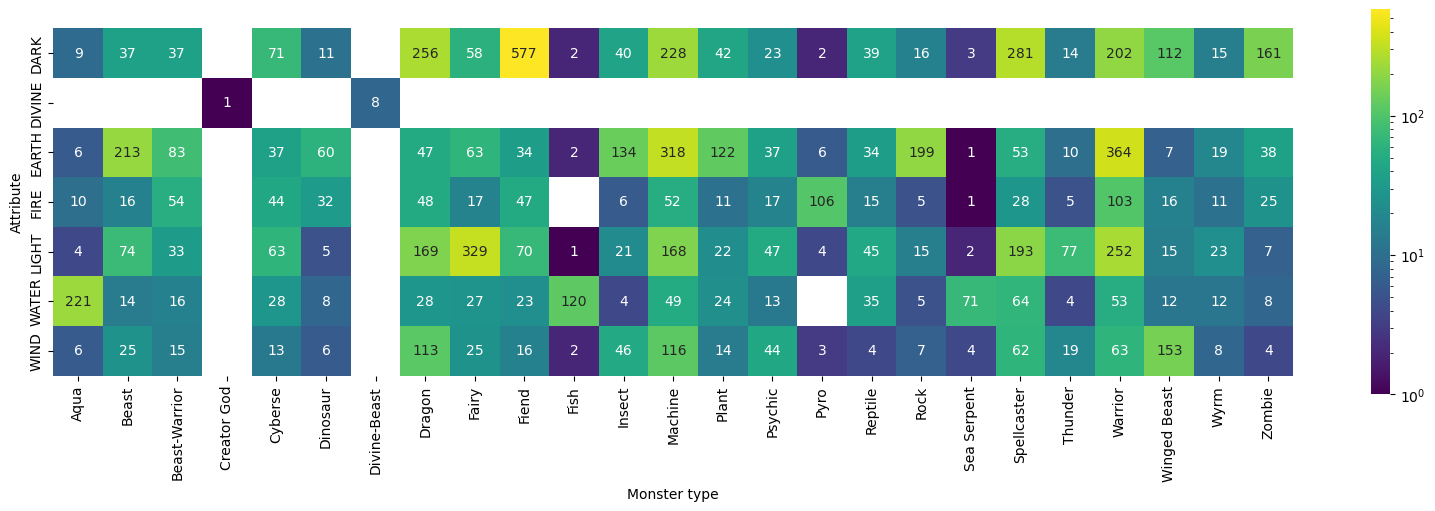

In [32]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab[monster_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

#### By primary type

In [33]:
monster_crosstab_b = pd.crosstab(full_df['Monster type'],full_df['Primary type'], dropna=False)
monster_crosstab_b

Primary type,Effect Monster,Fusion Monster,Link Monster,Monster Token,Normal Monster,Ritual Monster,Synchro Monster,Xyz Monster
Monster type,,,,,,,,
Aqua,154,11,3,0,59,8,4,17
Beast,273,17,9,0,54,1,14,11
Beast-Warrior,164,11,9,0,21,2,8,23
Creator God,1,0,0,0,0,0,0,0
Cyberse,126,5,97,0,7,7,5,9
Dinosaur,87,7,3,0,18,0,4,3
Divine-Beast,5,0,0,0,0,0,0,0
Dragon,348,64,33,0,46,15,94,61
Fairy,369,22,25,0,36,17,18,32


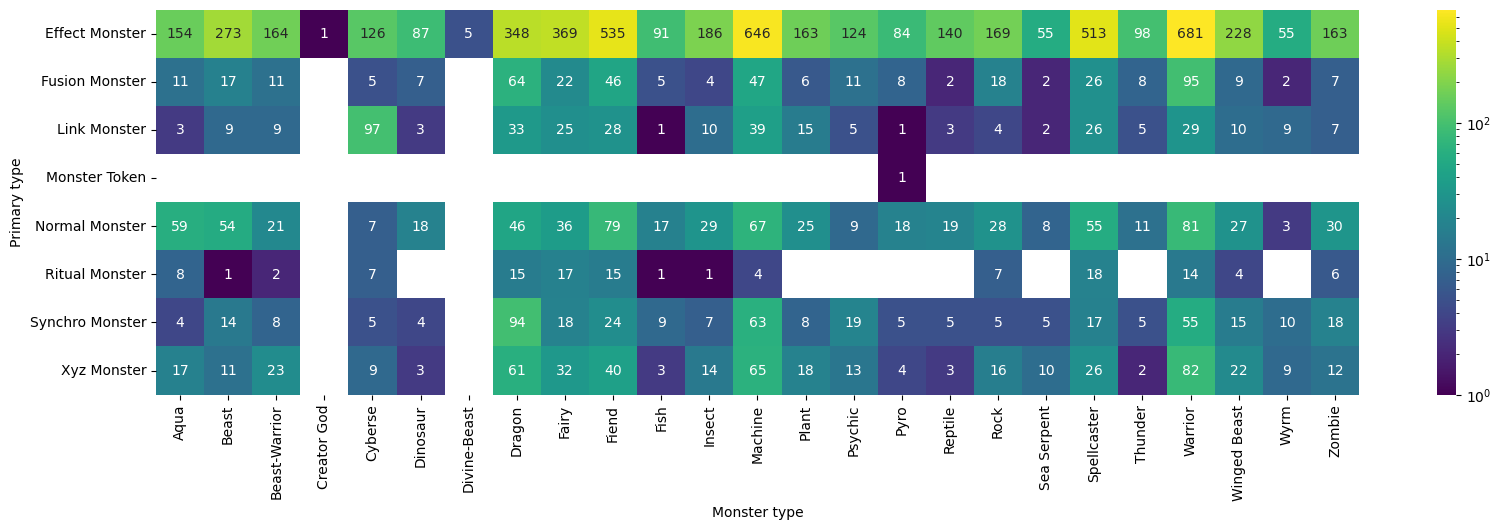

In [34]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_b[monster_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

#### By secondary type

In [35]:
monster_crosstab_c = pd.crosstab(full_df['Monster type'],full_df['Secondary type'], dropna=False)
monster_crosstab_c

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster
Monster type,,,,,,
Aqua,4,4,1,1,11,3
Beast,15,1,2,0,22,0
Beast-Warrior,1,0,1,0,9,0
Cyberse,0,0,0,0,7,0
Dinosaur,0,0,0,0,7,0
Dragon,1,6,1,3,44,4
Fairy,8,2,8,0,22,5
Fiend,27,4,2,1,41,1
Fish,0,1,0,0,8,0


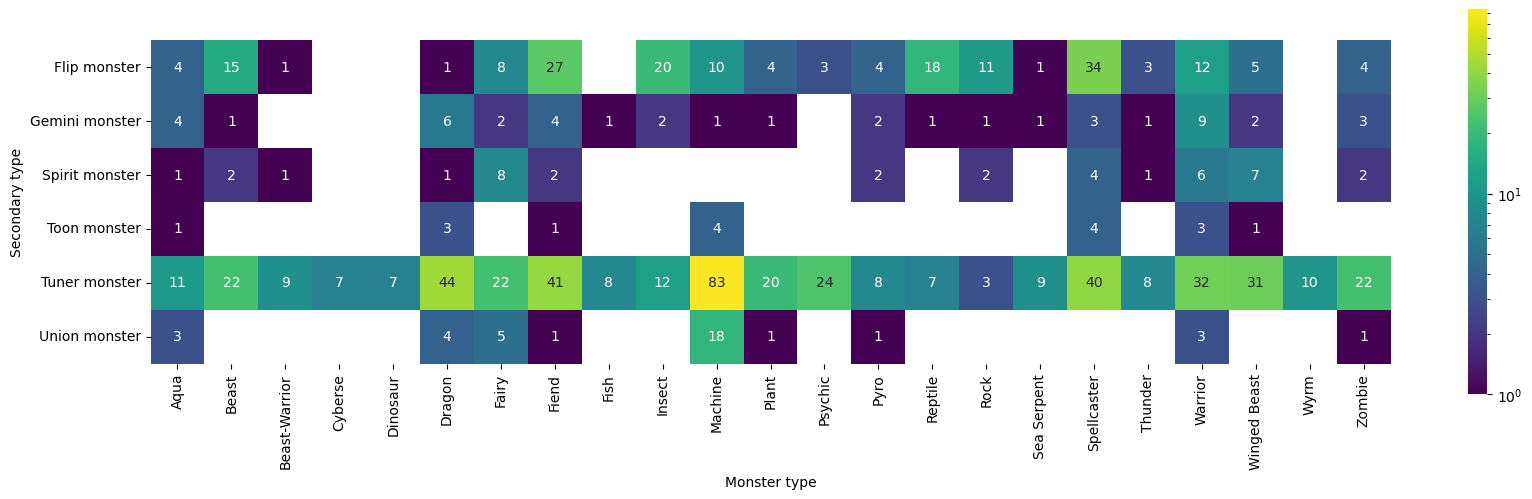

In [36]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_c[monster_crosstab_c>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

### Effect type

In [37]:
print('Total number of effect types:', monster_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [38]:
monster_df[monster_df['Effect type'].notna()].drop(columns=['Card type']).explode('Effect type').groupby('Effect type').nunique()

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Effect type,,,,,,,,,,,,,,,,,,,
Activation condition,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0
Condition,3112,3076,7,6,7,25,14,63,64,13,6,54,649,5,6,3112,3,3080,3
Continuous Effect,2167,2160,6,5,7,24,14,59,52,12,6,48,559,5,5,2167,3,2161,3
Continuous-like Effect,235,235,6,3,6,21,11,42,36,13,1,2,72,3,2,235,2,235,3
Flip effect,171,170,1,1,6,19,12,38,33,1,0,0,44,3,4,171,1,171,3
Ignition Effect,2618,2610,6,6,7,24,13,66,61,12,5,42,641,5,6,2618,3,2607,3
Ignition-like Effect,226,220,6,2,6,20,12,35,33,13,1,1,77,3,4,226,1,226,3
Lingering effect,19,19,2,2,6,14,8,13,14,0,2,2,12,2,2,19,0,18,0
Maintenance cost,44,44,3,0,6,12,8,21,18,2,1,1,8,1,1,44,0,44,1


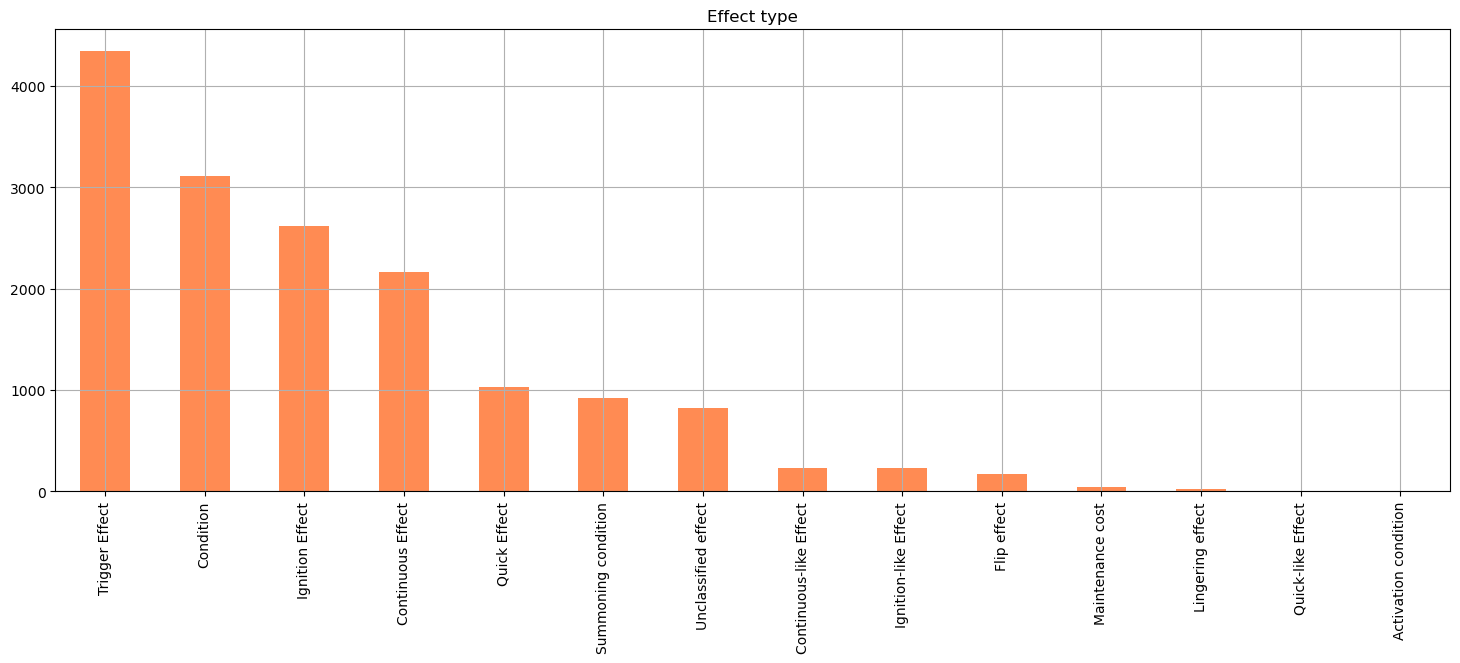

In [39]:
monster_effect_colors = colors_dict['Effect Monster']
monster_df['Effect type'].explode('Effect type').value_counts().plot.bar(figsize = (18,6), grid = True, color = monster_effect_colors, title='Effect type')
# plt.yscale('log')
plt.show()

### ATK

In [40]:
print('Total number of ATK values:', monster_df['ATK'].nunique())

Total number of ATK values: 82


In [41]:
monster_df.drop(columns=['Card type']).groupby('ATK').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
ATK,,,,,,,,,,,,,,,,,,,
0,626,600,8,5,6,23,13,35,9,5,15,94,236,7,6,626,3,624,3
50,2,2,1,0,2,2,1,2,0,0,0,2,2,1,1,2,0,2,0
100,219,219,5,3,6,20,11,27,8,2,2,48,107,4,2,219,2,219,3
150,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,1,0,1,0
200,122,122,6,5,6,20,7,22,5,1,2,36,69,3,3,122,1,122,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,12,12,3,0,3,6,4,4,0,0,0,10,9,1,1,12,1,12,2
4600,2,2,1,0,2,1,1,1,0,0,0,2,1,1,1,2,1,2,0
5000,9,9,5,0,3,4,2,4,0,1,1,8,6,1,1,9,1,9,1


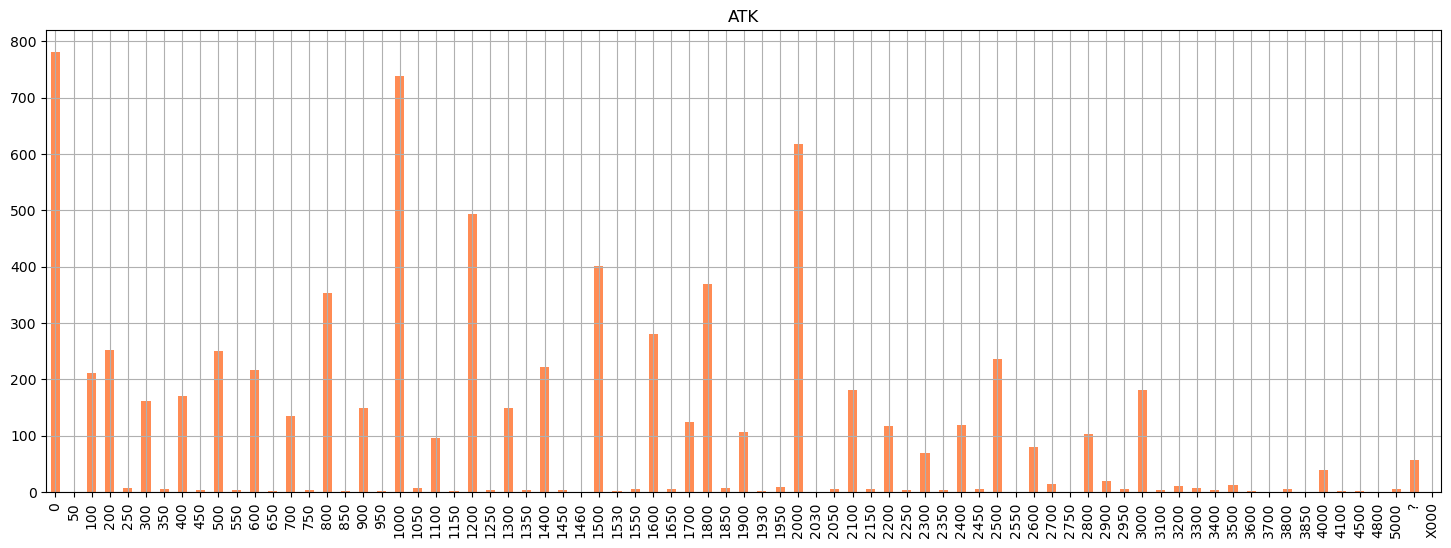

In [42]:
atk_colors = colors_dict['Monster Card']
monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = atk_colors, title = 'ATK')
plt.show()

### DEF

In [43]:
print('Total number of DEF values:', monster_df['DEF'].nunique())

Total number of DEF values: 77


In [44]:
monster_df.drop(columns=['Card type']).groupby('DEF').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
DEF,,,,,,,,,,,,,,,,,,,
0,781,754,7,6,6,23,14,45,10,0,0,104,260,6,5,781,2,777,3
50,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,1,0,1,0
100,211,211,5,4,6,19,10,24,8,0,0,47,95,4,3,211,2,208,3
200,252,251,5,5,6,23,10,31,5,0,0,48,109,3,4,252,2,252,3
250,8,8,2,1,4,5,2,4,0,0,0,5,3,1,1,8,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,2,2,2,0,2,2,1,1,0,0,0,2,1,1,1,2,0,2,0
4800,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,1,0,1,0
5000,5,5,2,0,3,3,2,2,0,0,0,4,3,1,1,5,1,5,1


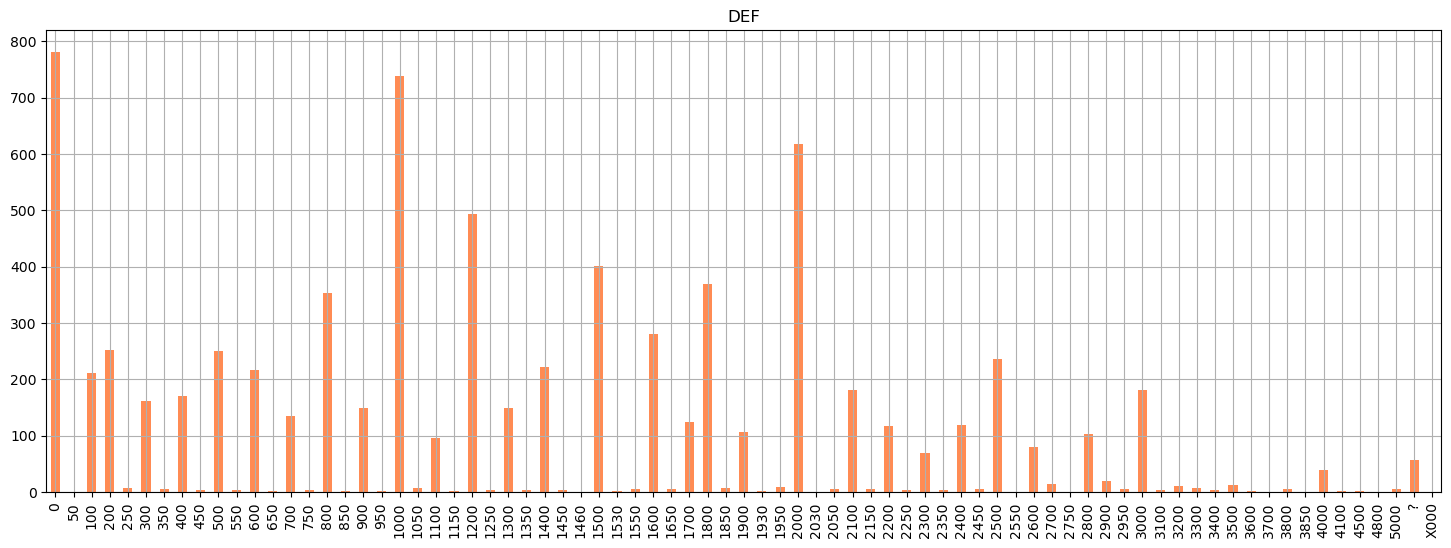

In [45]:
def_colors = colors_dict['Monster Card']
monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = def_colors, title = 'DEF')
plt.show()

### Level/Rank

In [46]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Level/Rank').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,ATK,DEF,Pendulum Scale,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Level/Rank,,,,,,,,,,,,,,,,,
0,6,6,2,0,2,2,3,3,0,5,3,2,2,6,0,6,0
1,635,610,7,5,6,23,22,29,10,81,228,6,4,635,2,633,3
2,680,674,6,5,6,23,29,30,7,75,214,5,6,680,2,679,3
3,1151,1144,6,5,6,23,41,36,9,94,293,5,7,1151,3,1151,3
4,2352,2347,6,6,6,23,54,47,9,134,513,5,7,2352,3,2345,3
5,599,599,6,6,6,23,46,38,8,84,241,3,3,599,2,599,3
6,610,607,6,6,6,23,38,38,9,92,234,6,5,611,3,611,3
7,470,465,6,6,6,23,38,35,9,101,226,5,5,472,2,470,3
8,678,665,6,5,6,23,42,41,8,111,299,5,5,680,3,678,3


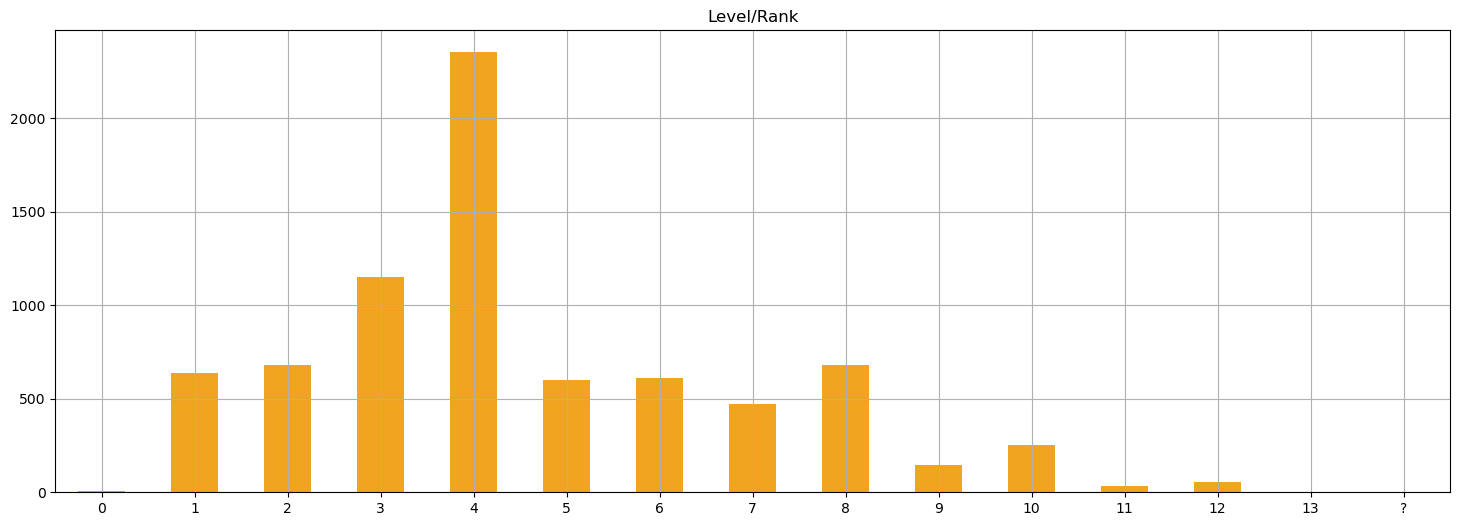

In [47]:
stars_colors = colors_dict['Level']
monster_df['Level/Rank'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color= stars_colors, title = 'Level/Rank')
plt.show()

#### ATK statistics

In [48]:
monster_df[['Level/Rank','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

ATK                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   600.000000  1341.640786  0.0     0.0     0.0     0.0   
1            625.0   238.640000   350.490371  0.0     0.0   100.0   300.0   
2            678.0   578.982301   409.340713  0.0   300.0   500.0   800.0   
3           1148.0   955.095819   487.813735  0.0   600.0  1000.0  1300.0   
4           2340.0  1417.790598   541.912389  0.0  1200.0  1500.0  1800.0   
5            596.0  1763.708054   641.811912  0.0  1500.0  1900.0  2200.0   
6            607.0  2014.744646   611.962077  0.0  1900.0  2200.0  2400.0   
7            466.0  2285.300429   619.619738  0.0  2200.0  2500.0  2600.0   
8            670.0  2546.940299   706.404851  0.0  2500.0  2800.0  3000.0   
9            142.0  2603.169014   836.367839  0.0  2500.0  2800.0  3000.0   
10           232.0  2817.456897  1216.555708  0.0  2800.0  3000.0  3500.0   
11            31.0  2990.322581  1074.741779  0.0  3000.0  3300.0  3500.0   
12            50.0  3312.000000  1376.573682  0.0  3000.0  4000.0  4000.0   

                    
               max  
Level/Rank          
0           3000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           4000.0  
6           4000.0  
7           3300.0  
8           4500.0  
9           4500.0  
10          5000.0  
11          4000.0  
12          5000.0

#### DEF statistics

In [49]:
monster_df[['Level/Rank','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

DEF                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   400.000000   894.427191  0.0     0.0     0.0     0.0   
1            627.0   338.835726   519.149049  0.0     0.0   100.0   400.0   
2            679.0   663.475700   557.721605  0.0   200.0   500.0   900.0   
3           1148.0   952.700348   573.891888  0.0   600.0   900.0  1300.0   
4           2342.0  1168.736123   608.992578  0.0   800.0  1200.0  1600.0   
5            597.0  1426.800670   674.875068  0.0  1000.0  1500.0  1900.0   
6            607.0  1553.261944   710.806428  0.0  1200.0  1600.0  2000.0   
7            468.0  1889.957265   653.057050  0.0  1600.0  2000.0  2312.5   
8            677.0  1983.013294   847.485537  0.0  1600.0  2100.0  2500.0   
9            142.0  2308.802817   792.838050  0.0  2000.0  2500.0  2900.0   
10           241.0  2232.572614  1274.618905  0.0  1900.0  2500.0  3000.0   
11            31.0  2672.580645  1151.364315  0.0  2250.0  3000.0  3400.0   
12            51.0  2896.078431  1603.241814  0.0  2000.0  3200.0  4000.0   

                    
               max  
Level/Rank          
0           2000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           3000.0  
6           3000.0  
7           3300.0  
8           4000.0  
9           3700.0  
10          5000.0  
11          4000.0  
12          5000.0

### Pendulum scale

In [50]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Pendulum Scale').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Pendulum Scale,,,,,,,,,,,,,,,,,
0,11,11,2,1,5,8,6,6,6,9,8,1,1,11,1,11,0
1,70,67,5,2,6,10,11,28,27,38,39,3,4,70,1,70,1
2,36,36,2,1,6,11,6,17,22,21,15,3,2,36,1,36,2
3,37,37,3,1,6,16,8,23,15,24,17,1,1,37,0,37,0
4,33,33,5,0,5,8,8,18,16,25,17,1,1,33,2,33,1
5,34,34,2,1,6,12,7,23,21,20,16,3,3,34,0,34,1
6,15,15,1,1,4,7,6,11,11,11,9,1,1,15,0,15,0
7,27,27,2,1,6,14,6,19,17,14,16,1,1,27,1,27,2
8,43,43,5,1,6,9,8,19,18,24,23,1,2,43,0,43,0


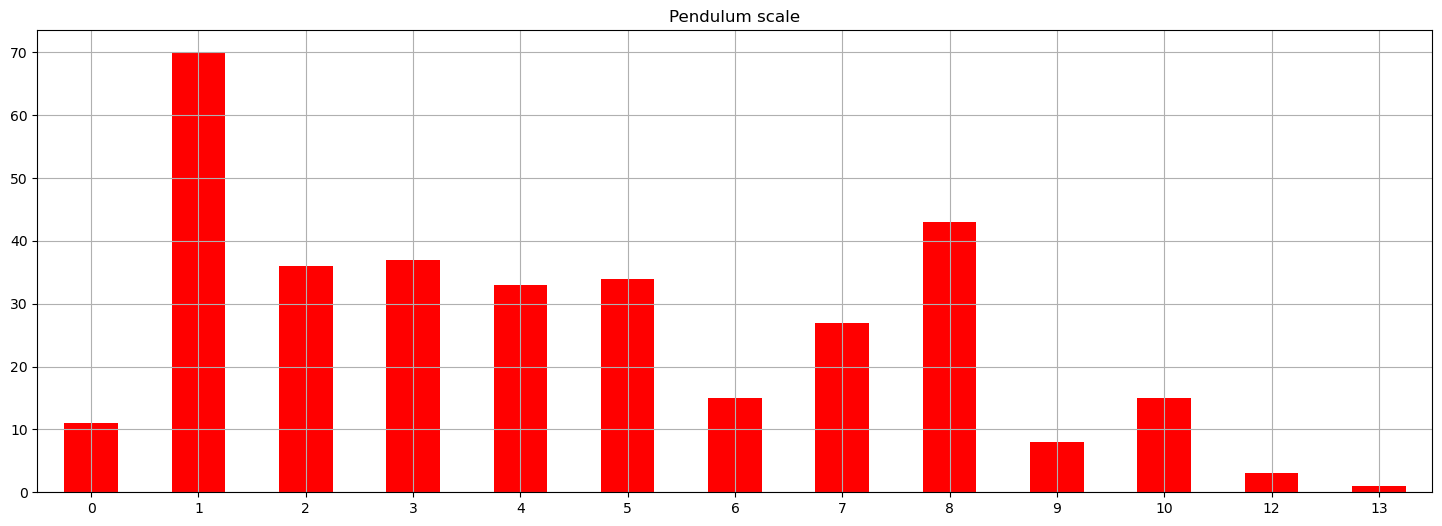

In [51]:
scales_colors = colors_dict['Pendulum Monster']
monster_df['Pendulum Scale'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = scales_colors, title = 'Pendulum scale')
plt.show()

#### ATK statistics

In [52]:
monster_df[['Pendulum Scale','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

ATK                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1281.818182  1300.629218     0.0     0.0  1100.0   
1               69.0  1740.579710  1034.737654     0.0  1000.0  1800.0   
2               36.0  1423.611111   688.734462   100.0   800.0  1500.0   
3               37.0  1463.513514   848.417534     0.0   600.0  1750.0   
4               33.0  1824.242424  1017.972956     0.0  1200.0  2000.0   
5               34.0  1339.705882   808.831875     0.0   850.0  1325.0   
6               15.0  1320.000000   707.308783   100.0   950.0  1500.0   
7               27.0  1279.629630   787.920737     0.0   700.0  1400.0   
8               43.0  1211.627907   946.222893     0.0   300.0  1200.0   
9                8.0  2150.000000   730.948503  1000.0  2050.0  2400.0   
10              15.0  1766.666667  1369.914839     0.0   250.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2500.0  4000.0  
2               2000.0  2500.0  
3               2100.0  2600.0  
4               2700.0  3000.0  
5               1800.0  3450.0  
6               1800.0  2400.0  
7               1750.0  3000.0  
8               1900.0  3300.0  
9               2500.0  2800.0  
10              2950.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### DEF statistics

In [53]:
monster_df[['Pendulum Scale','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

DEF                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1154.545455  1217.672892     0.0     0.0   700.0   
1               70.0  1632.857143   968.447350     0.0  1000.0  1800.0   
2               36.0  1338.888889   728.316171     0.0   875.0  1200.0   
3               37.0  1144.594595   787.910720     0.0   500.0  1200.0   
4               33.0  1563.636364   834.347867     0.0  1000.0  1600.0   
5               34.0  1136.764706   822.625953     0.0   550.0  1000.0   
6               15.0  1226.666667   711.604492   400.0   600.0  1100.0   
7               27.0  1312.962963   830.383669     0.0   700.0  1300.0   
8               43.0  1048.837209   761.693631     0.0   400.0  1000.0   
9                8.0  1225.000000   636.396103  1000.0  1000.0  1000.0   
10              15.0  1926.666667  1123.430122     0.0  1000.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2400.0  4000.0  
2               1825.0  2700.0  
3               1800.0  3000.0  
4               2300.0  2800.0  
5               1575.0  3000.0  
6               1700.0  2600.0  
7               2000.0  2700.0  
8               1600.0  2700.0  
9               1000.0  2800.0  
10              2700.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### Level/Rank statistics

In [54]:
monster_df[['Pendulum Scale','Level/Rank']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

Level/Rank                                                  
                    count      mean       std  min   25%   50%    75%   max
Pendulum Scale                                                             
0                    11.0  5.636364  3.529100  1.0  2.00   7.0   8.00  10.0
1                    70.0  6.042857  2.410338  1.0  4.00   6.0   8.00  12.0
2                    36.0  4.416667  1.380993  1.0  3.75   4.0   5.00   7.0
3                    37.0  4.432432  1.708484  1.0  4.00   4.0   5.00  10.0
4                    33.0  5.606061  2.135114  1.0  4.00   6.0   7.00   8.0
5                    34.0  4.176471  1.961301  1.0  3.00   4.0   4.00  11.0
6                    15.0  3.933333  1.579632  1.0  3.00   4.0   4.50   8.0
7                    27.0  4.185185  1.641693  2.0  3.00   4.0   5.00  10.0
8                    43.0  3.860465  2.284330  1.0  2.00   4.0   5.00  10.0
9                     8.0  5.625000  1.302470  4.0  5.00   5.0   6.25   8.0
10                   15.0  7.066667  3.034720  1.0  7.00   7.0   9.00  12.0
12                    3.0  8.333333  6.350853  1.0  6.50  12.0  12.00  12.0
13                    1.0  7.000000       NaN  7.0  7.00   7.0   7.00   7.0

### Link

In [55]:
monster_df.drop(columns=['Card type', 'Primary type', 'Secondary type','Level/Rank','DEF','Pendulum Scale']).groupby('Link').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Attribute,Monster type,ATK,Link Arrows,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Link,,,,,,,,,,,,,,
1,48,48,6,11,10,8,17,27,3,4,48,1,48,0
2,186,186,6,23,24,19,32,102,2,4,186,3,184,2
3,84,84,6,16,18,17,25,48,2,2,84,2,84,1
4,44,41,6,16,12,13,21,24,3,4,44,3,44,0
5,9,6,2,5,4,3,6,5,3,2,9,0,9,0
6,2,2,1,1,2,2,2,2,1,1,2,0,2,0


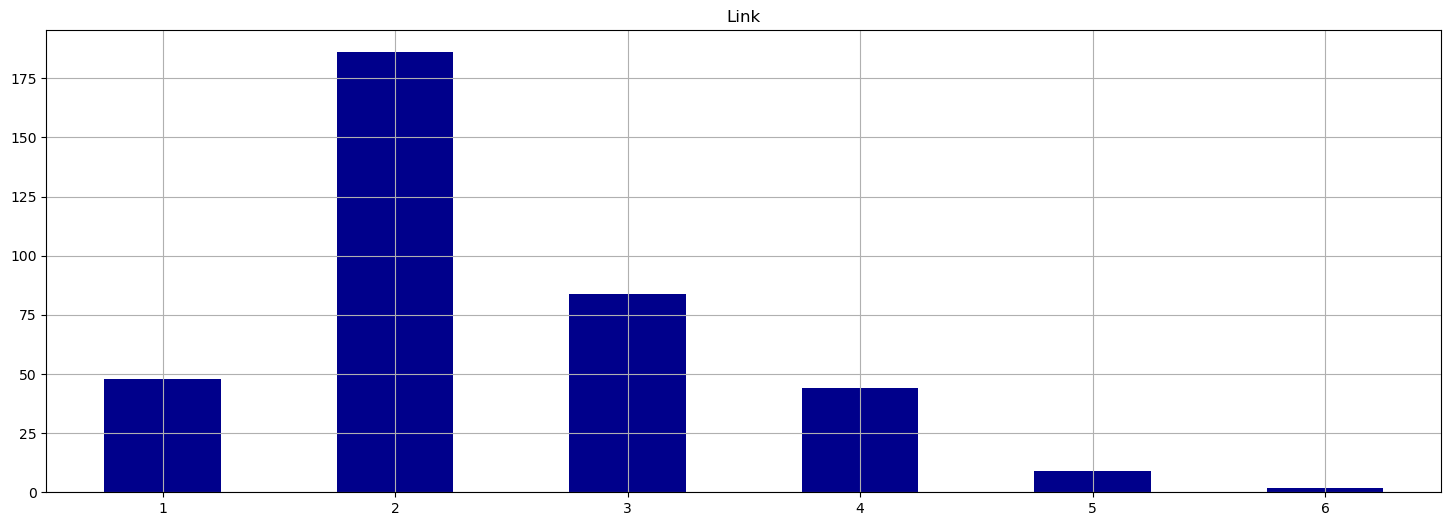

In [56]:
link_colors = colors_dict['Link Monster']
monster_df['Link'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = link_colors, title='Link')
plt.show()

#### ATK statistics

In [57]:
monster_df[['Link','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Link').describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Link                                                                         
1      48.0   737.500000   477.860925     0.0   450.0   800.0  1000.0  1500.0
2     186.0  1405.645161   508.849113     0.0  1100.0  1500.0  1800.0  2300.0
3      84.0  2258.928571   651.234264     0.0  2200.0  2400.0  2500.0  4000.0
4      43.0  2660.465116   653.976676     0.0  2500.0  2800.0  3000.0  3300.0
5       9.0  3277.777778   712.000312  2500.0  3000.0  3000.0  3500.0  5000.0
6       2.0  1750.000000  2474.873734     0.0   875.0  1750.0  2625.0  3500.0

### Link Arrows

#### By combination

In [58]:
print('Total number of link arrow combinations:', monster_df['Link Arrows'].nunique())

Total number of link arrow combinations: 62


In [59]:
monster_df.drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Link', 'Secondary type', 'DEF']).groupby('Link Arrows').nunique()

,Name,Password,Attribute,Monster type,ATK,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Link Arrows,,,,,,,,,,,,,
"(←,)",5,5,2,3,2,4,4,3,2,5,0,5,0
"(←, ↑)",4,4,2,3,4,3,2,1,1,4,0,4,0
"(←, →)",18,18,6,8,11,8,9,2,2,18,1,18,0
"(←, →, ↑)",8,8,4,5,6,7,5,1,1,8,0,8,0
"(↑,)",10,10,5,5,6,9,5,1,1,10,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(↙, ↘, ←, ↖)",1,1,1,1,1,1,1,1,1,1,0,1,0
"(↙, ↘, ↑)",22,22,6,11,11,11,15,2,2,22,2,22,1
"(↙, ↘, →)",2,2,2,2,2,2,2,1,1,2,0,2,0


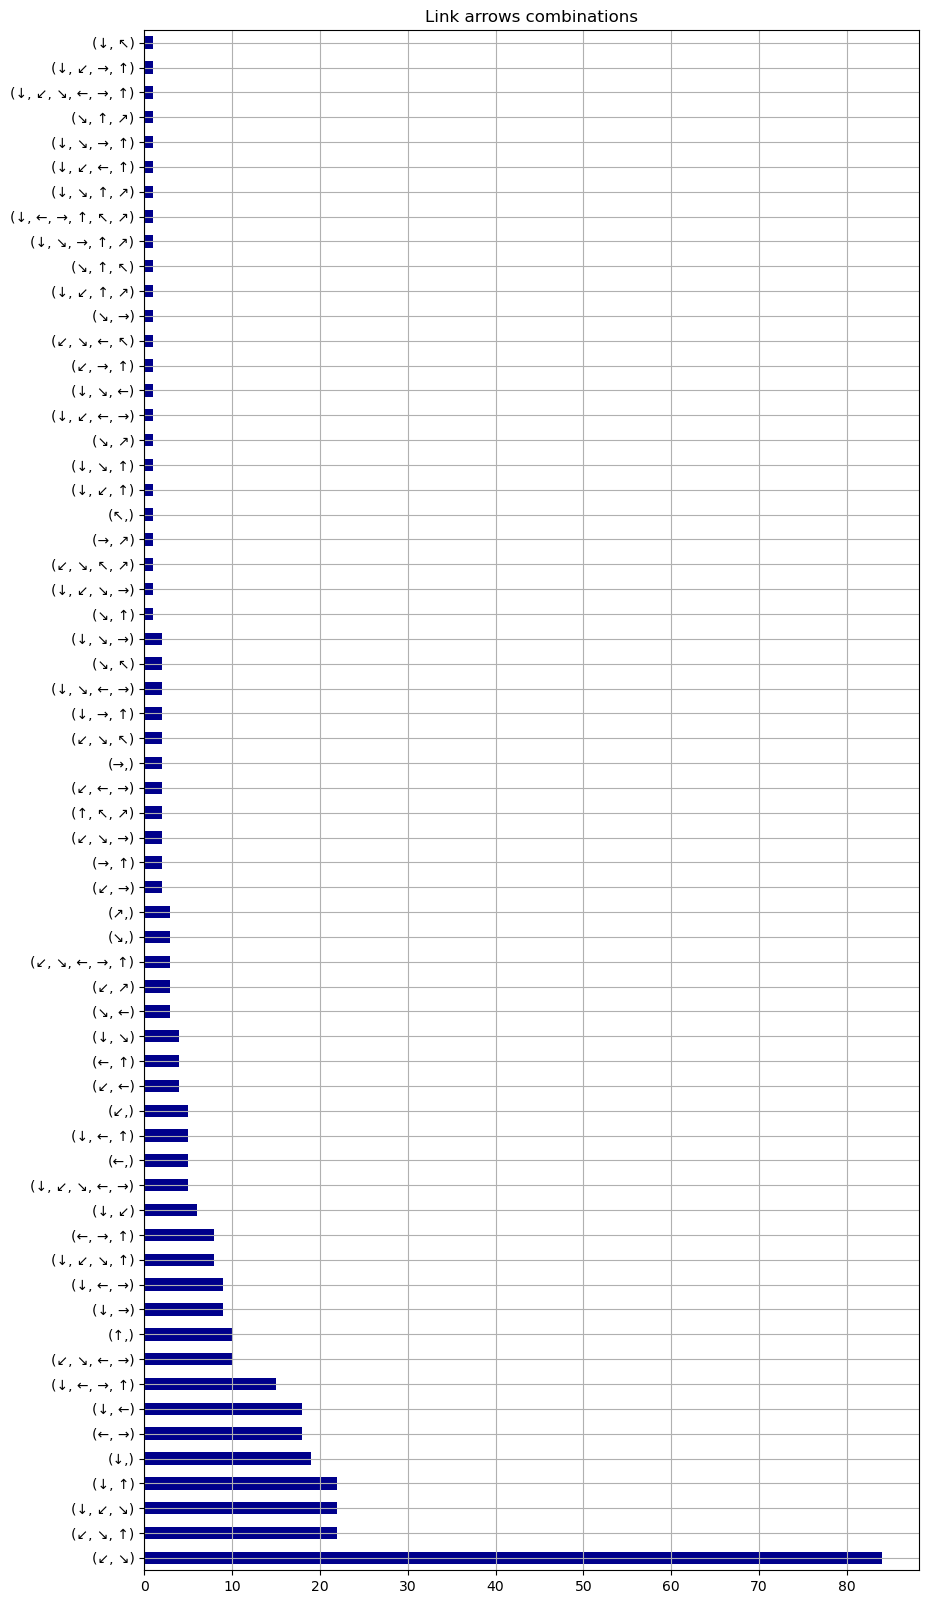

In [60]:
arrows_colors = colors_dict['Link Monster']
monster_df['Link Arrows'].value_counts().plot.barh(figsize = (10,20), grid = True, color = arrows_colors, title = 'Link arrows combinations')
plt.show()

#### By unique

In [61]:
monster_df[monster_df['Link Arrows'].notna()].drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Secondary type', 'DEF']).explode('Link Arrows').groupby('Link Arrows').nunique()

,Name,Password,Attribute,Monster type,ATK,Link,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Link Arrows,,,,,,,,,,,,,,
←,117,111,6,21,29,6,35,46,5,3,117,3,117,0
↑,117,114,6,19,27,6,31,44,4,4,117,3,117,1
→,103,97,6,19,27,6,30,40,4,3,103,2,103,0
↓,162,156,6,20,32,6,41,70,3,4,162,3,161,0
↖,12,12,5,5,10,5,7,6,1,2,12,2,12,0
↗,16,16,5,7,11,6,7,8,1,2,16,2,16,0
↘,188,185,6,22,33,6,36,103,4,4,188,3,187,2
↙,190,187,6,22,34,6,37,104,4,5,190,3,189,2


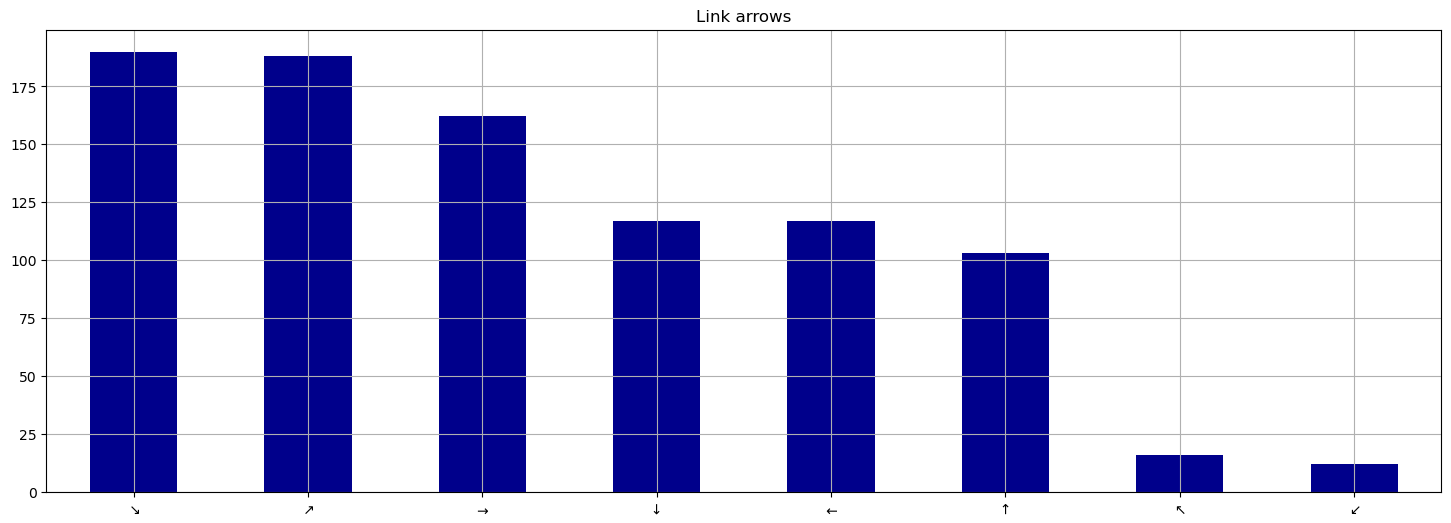

In [62]:
arrows_colors_b = colors_dict['Link Monster']
monster_df['Link Arrows'].explode('Link Arrows').value_counts().plot.bar(figsize = (18,6), grid = True, color = arrows_colors_b, title = 'Link arrows')
plt.show()

#### By link

In [63]:
arrow_per_link = monster_df[['Link Arrows','Link']].explode('Link Arrows').dropna()
arrow_crosstab = pd.crosstab(arrow_per_link['Link Arrows'],arrow_per_link['Link'])
arrow_crosstab

Link,1,2,3,4,5,6
Link Arrows,,,,,,
←,5,47,25,30,8,2
↑,10,29,44,28,4,2
→,2,33,26,31,9,2
↓,19,60,43,32,6,2
↖,1,3,5,2,0,1
↗,3,5,3,3,1,1
↘,3,96,54,25,9,1
↙,5,99,52,25,8,1


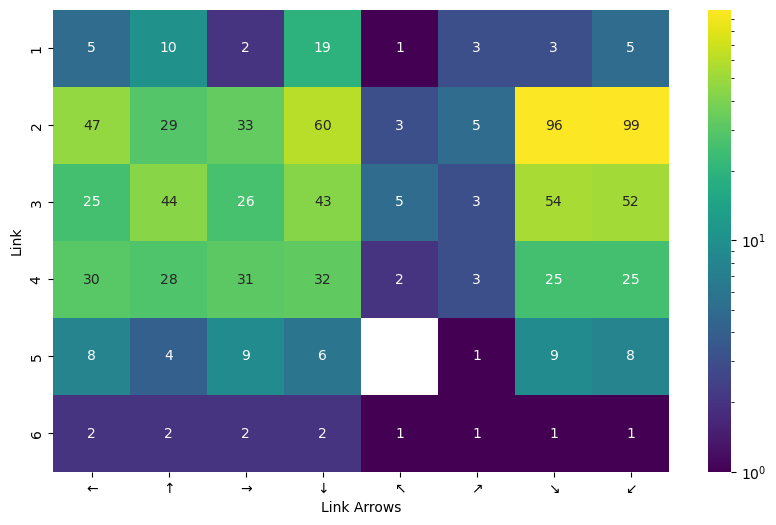

In [64]:
plt.figure(figsize = (10,6))
sns.heatmap(arrow_crosstab[arrow_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

## Spell & Trap

### Properties

In [65]:
print('Total number of properties:', st_df['Property'].nunique())

Total number of properties: 9


In [66]:
st_df.drop(columns=['Card type']).groupby('Property').nunique()

,Name,Password,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Property,,,,,,,,,,
Continuous Spell Card,422,421,55,162,5,4,422,2,418,3
Continuous Trap Card,494,486,64,162,3,2,494,1,493,3
Counter Trap Card,157,155,19,59,2,2,157,1,157,2
Equip Spell Card,264,264,37,74,3,2,264,1,264,3
Field Spell Card,276,273,35,143,5,4,277,1,277,3
Normal Spell Card,921,920,43,231,5,5,922,3,920,3
Normal Trap Card,1172,1170,48,240,6,4,1172,2,1169,2
Quick-Play Spell Card,434,430,35,140,3,3,434,1,431,3
Ritual Spell Card,75,75,8,25,2,1,75,1,75,2


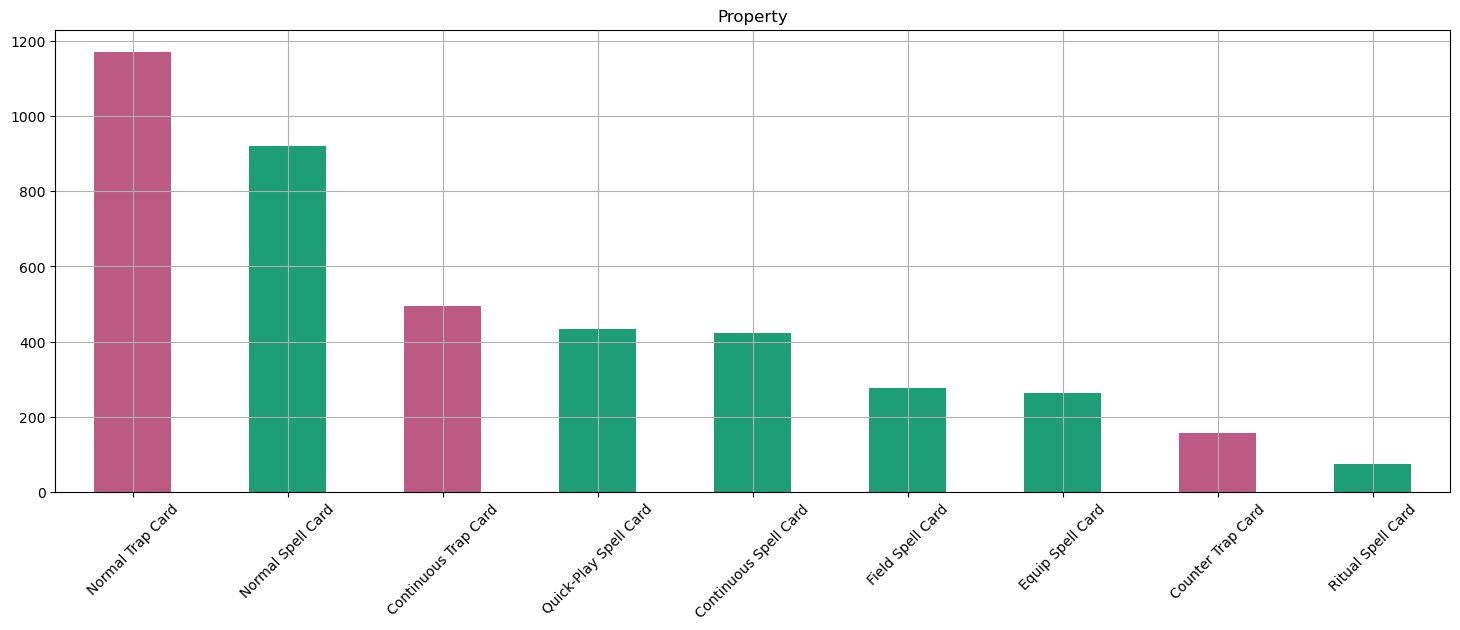

In [67]:
st_colors = [colors_dict[i] for i in full_df[['Card type','Property']].value_counts().index.get_level_values(0)]
st_df['Property'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = st_colors, title = 'Property')
plt.show()

### Effect type

In [68]:
print('Total number of effect types:', st_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [69]:
st_df.explode('Effect type').groupby('Effect type').nunique()

,Name,Password,Card type,Property,Archseries,TCG status,OCG status,Page name,Artwork,Modification date,Errata
Effect type,,,,,,,,,,,
Activation condition,835,828,2,8,171,5,5,835,2,834,3
Condition,1698,1686,2,9,374,6,4,1699,2,1676,3
Continuous Effect,21,21,2,6,12,2,1,21,1,20,2
Continuous-like Effect,904,897,2,7,237,5,4,905,2,902,3
Cost,452,450,2,7,112,5,4,452,2,452,3
Effect,2955,2940,2,9,431,6,5,2956,3,2938,3
Ignition Effect,2,2,2,2,2,2,1,2,0,2,0
Ignition-like Effect,447,445,1,6,185,4,4,447,2,444,2
Lingering effect,96,96,2,6,43,4,3,96,1,96,2


#### Spell & Trap discrimination

In [70]:
spell = spell_df['Effect type'].explode('Effect type').value_counts().rename('Spell Card')
trap = trap_df['Effect type'].explode('Effect type').value_counts().rename('Trap Card')
st_diff = pd.concat([spell, trap], axis = 1).fillna(0).astype(int)
st_diff

,Spell Card,Trap Card
Effect,1541,1415
Condition,1150,549
Continuous-like Effect,620,285
Trigger Effect,572,276
Ignition-like Effect,447,0
Activation condition,245,590
Cost,241,211
Unclassified effect,64,22
Lingering effect,56,40
Maintenance cost,11,11


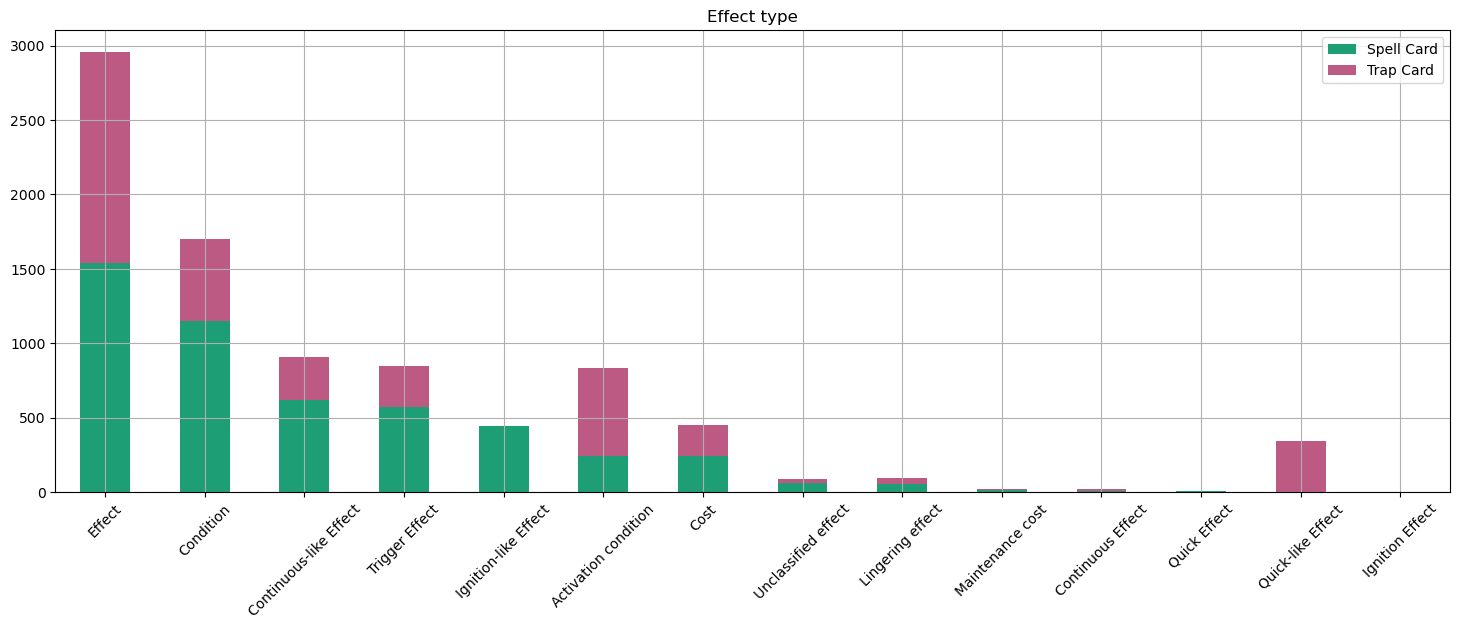

In [71]:
st_diff_colors = {'Spell Card': colors_dict['Spell Card'], 'Trap Card': colors_dict['Trap Card']}
st_diff.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=45, color = st_diff_colors, title = 'Effect type')
plt.show()

## Archseries

In [72]:
exploded_archseries = full_df.explode('Archseries')
print('Total number of Archseries:', exploded_archseries['Archseries'].nunique())

Total number of Archseries: 715


In [73]:
exploded_archseries.groupby('Archseries').nunique()

,Name,Password,Card type,Property,Effect type,TCG status,OCG status,Page name,Artwork,Modification date,...,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows
Archseries,,,,,,,,,,,,,,,,,,,,,
"""C""",9,9,1,0,7,2,1,9,0,9,...,2,0,1,1,8,9,8,0,0,0
-Eyes Dragon,73,73,1,0,44,2,2,73,1,73,...,7,2,6,3,10,16,13,6,1,1
/Assault Mode,7,7,1,0,5,1,1,7,0,7,...,1,0,5,6,5,6,6,0,0,0
@Ignister,18,18,1,0,9,1,1,18,0,18,...,6,1,6,1,7,10,9,0,3,4
A-to-Z,16,16,1,0,5,1,1,16,2,16,...,3,1,1,1,4,13,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sphinx,10,10,2,1,9,1,1,10,0,10,...,1,0,2,2,4,8,5,0,0,0
sprout,2,2,1,0,2,1,1,2,0,2,...,1,0,1,1,1,1,1,0,0,0
tellarknight,25,25,2,4,12,1,2,25,0,25,...,2,0,2,4,2,16,15,2,0,0


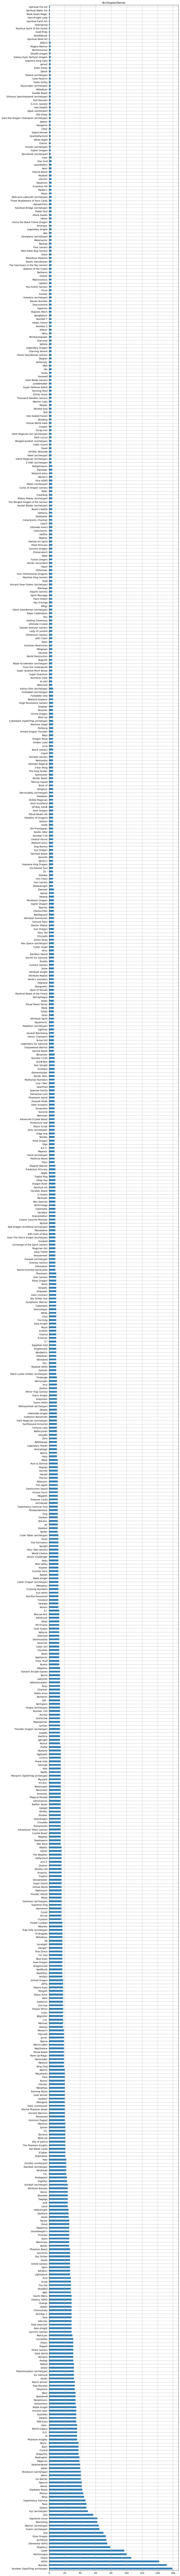

In [74]:
exploded_archseries['Archseries'].value_counts().plot.barh(figsize = (10,200), grid = True, title = 'Archtypes/Series')
plt.show()

### By card type

In [75]:
archseries_crosstab = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Card type'], margins = True)
archseries_crosstab

Card type,Monster Card,Spell Card,Trap Card,All
Archseries,,,,
"""C""",9,0,0,9
-Eyes Dragon,73,0,0,73
/Assault Mode,7,0,0,7
@Ignister,18,0,0,18
A-to-Z,16,0,0,16
...,...,...,...,...
sprout,2,0,0,2
tellarknight,20,5,0,25
with Chain,0,0,4,4


### By primary type

In [76]:
archseries_crosstab_b = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Primary type'], margins = True)
archseries_crosstab_b

Primary type,Effect Monster,Fusion Monster,Link Monster,Monster Token,Normal Monster,Ritual Monster,Synchro Monster,Xyz Monster,All
Archseries,,,,,,,,,
"""C""",8,0,0,0,1,0,0,0,9
-Eyes Dragon,31,11,1,0,3,4,5,18,73
/Assault Mode,7,0,0,0,0,0,0,0,7
@Ignister,10,1,4,0,0,1,1,1,18
A-to-Z,6,8,0,0,2,0,0,0,16
...,...,...,...,...,...,...,...,...,...
sphinx,9,0,0,0,0,0,0,0,9
sprout,2,0,0,0,0,0,0,0,2
tellarknight,14,0,0,0,0,0,0,6,20




### By secondary type

In [77]:
archseries_crosstab_c = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Secondary type'], margins = True)
archseries_crosstab_c

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster,All
Archseries,,,,,,,
-Eyes Dragon,0,2,0,2,0,0,4
@Ignister,0,0,0,0,1,0,1
A-to-Z,0,0,0,0,0,6,6
Adamancipator,0,0,0,0,3,0,3
Alien,1,1,0,0,1,0,3
...,...,...,...,...,...,...,...
itsu,0,0,0,0,0,2,2
lswarm,2,0,0,0,0,0,2
roid,0,0,0,0,9,0,9


### By monster type

In [78]:
archseries_crosstab_d = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Monster type'], margins = True)
archseries_crosstab_d

Monster type,Aqua,Beast,Beast-Warrior,Creator God,Cyberse,Dinosaur,Divine-Beast,Dragon,Fairy,Fiend,...,Reptile,Rock,Sea Serpent,Spellcaster,Thunder,Warrior,Winged Beast,Wyrm,Zombie,All
Archseries,,,,,,,,,,,,,,,,,,,,,
"""C""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
-Eyes Dragon,0,0,0,0,0,0,0,68,0,0,...,0,0,0,0,0,0,0,0,3,73
/Assault Mode,0,0,0,0,0,0,0,2,0,0,...,0,0,0,1,0,1,0,0,1,7
@Ignister,0,0,0,0,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
A-to-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sphinx,0,3,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,0,0,9
sprout,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
tellarknight,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,17,0,1,0,20


### By property

In [79]:
archseries_crosstab_e = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Property'], margins = True)
archseries_crosstab_e

Property,Continuous Spell Card,Continuous Trap Card,Counter Trap Card,Equip Spell Card,Field Spell Card,Normal Spell Card,Normal Trap Card,Quick-Play Spell Card,Ritual Spell Card,All
Archseries,,,,,,,,,,
A.I.,1,3,0,0,1,4,1,2,1,13
Abyss Actor,0,0,0,0,0,1,2,0,0,3
Abyss Script,1,0,0,0,0,5,0,1,0,7
Abyss-,0,1,0,3,0,0,3,0,0,7
Adamancipator,0,0,1,0,1,2,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...
sphinx,0,1,0,0,0,0,0,0,0,1
tellarknight,1,0,0,1,1,0,0,2,0,5
with Chain,0,0,0,0,0,0,4,0,0,4


## Artworks

In [80]:
print('Total number of cards with edited or alternate artworks:', full_df['Artwork'].count())

Total number of cards with edited or alternate artworks: 622


In [81]:
full_df[['Name','Password','TCG status','OCG status','Artwork']][full_df['Artwork'].notna()]

,Name,Password,TCG status,OCG status,Artwork
16,A Deal with Dark Ruler,06850209,Unlimited,Unlimited,"(Edited,)"
30,A-to-Z-Dragon Buster Cannon,65172015,Unlimited,Unlimited,"(Edited,)"
49,Absolute End,27744077,Unlimited,Unlimited,"(Edited,)"
53,Absorbing Kid from the Sky,49771608,Unlimited,Unlimited,"(Edited,)"
63,Abyss Actor - Mellow Madonna,78310590,Unlimited,Unlimited,"(Edited,)"
...,...,...,...,...,...
12122,Yorishiro of the Aqua,57511992,Unlimited,Unlimited,"(Edited,)"
12236,Zombino,14575467,Unlimited,Unlimited,"(Edited,)"
12238,Zombyra the Dark,88472456,Unlimited,Unlimited,"(Edited,)"
12240,Zoodiac Barrage,46060017,Forbidden,Limited,"(Edited,)"


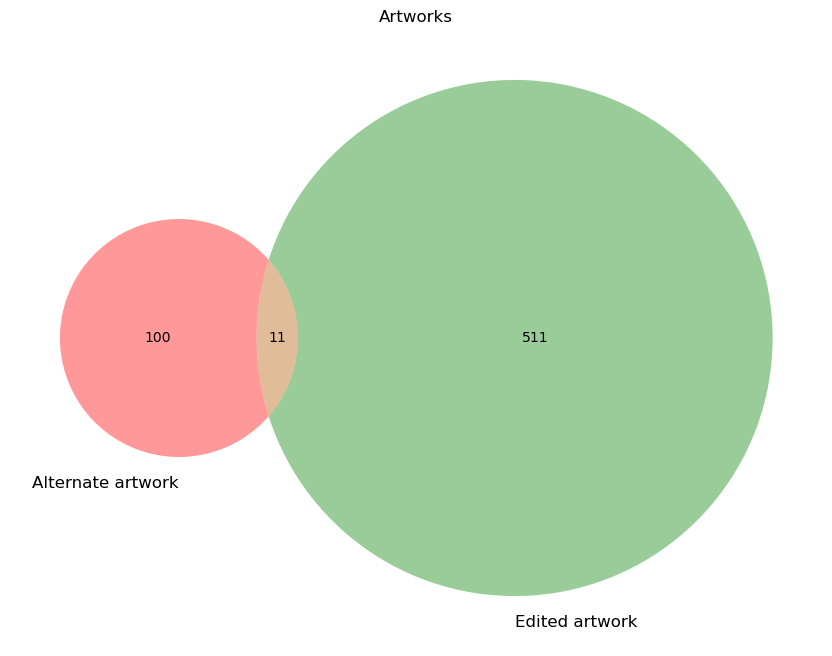

In [82]:
artwork_value_counts = full_df['Artwork'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Artworks')
venn2(subsets = (artwork_value_counts[('Alternate',)], artwork_value_counts[('Edited',)],artwork_value_counts[('Alternate','Edited')]), set_labels = ('Alternate artwork', 'Edited artwork'))
plt.show()

### By card type

In [83]:
artwork_crosstab = pd.crosstab(full_df['Artwork'], full_df['Card type'])
artwork_crosstab

Card type,Monster Card,Spell Card,Trap Card
Artwork,,,
"(Alternate,)",88,7,5
"(Alternate, Edited)",10,1,0
"(Edited,)",287,118,106


### By primary type

In [84]:
artwork_crosstab_b = pd.crosstab(full_df['Artwork'], full_df['Primary type'])
artwork_crosstab_b

Primary type,Effect Monster,Fusion Monster,Link Monster,Normal Monster,Ritual Monster,Synchro Monster,Xyz Monster
Artwork,,,,,,,
"(Alternate,)",37,13,9,21,0,3,5
"(Alternate, Edited)",2,1,5,2,0,0,0
"(Edited,)",188,21,10,42,6,5,15


More granularity is unnecessary

## Errata

In [85]:
print('Total number of cards with name or type errata:', full_df['Errata'].count())

Total number of cards with name or type errata: 1145


In [86]:
full_df[['Name','Password','TCG status','OCG status','Errata']][full_df['Errata'].notna()]

,Name,Password,TCG status,OCG status,Errata
0,"""A"" Cell Breeding Device",34541863,Unlimited,Unlimited,"(Name,)"
13,7 Completed,86198326,Unlimited,Unlimited,"(Type,)"
16,A Deal with Dark Ruler,06850209,Unlimited,Unlimited,"(Name, Type)"
21,A Legendary Ocean,00295517,Unlimited,Unlimited,"(Type,)"
26,A Wingbeat of Giant Dragon,28596933,Unlimited,Unlimited,"(Type,)"
...,...,...,...,...,...
12113,Yellow Gadget,13839120,Unlimited,Unlimited,"(Type,)"
12121,Yomi Ship,51534754,Unlimited,Unlimited,"(Type,)"
12154,Z-Metal Tank,64500000,Unlimited,Unlimited,"(Type,)"
12178,Zaborg the Thunder Monarch,51945556,Unlimited,Unlimited,"(Type,)"


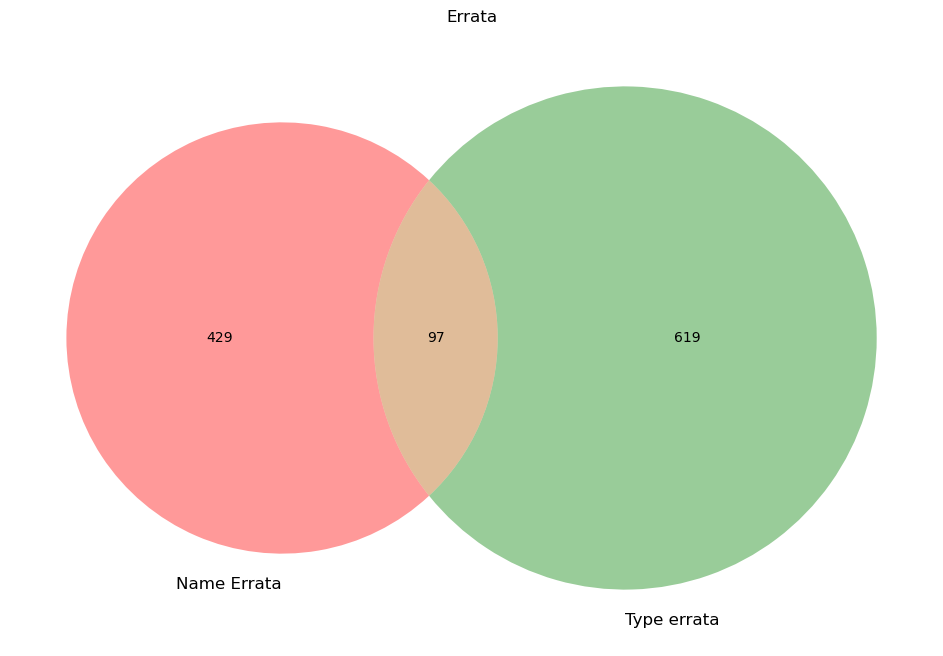

In [87]:
errata_value_counts = full_df['Errata'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Errata')
venn2(subsets = (errata_value_counts[('Name',)], errata_value_counts[('Type',)],errata_value_counts[('Name','Type')]), set_labels = ('Name Errata', 'Type errata'))
plt.show()

### By card type

In [88]:
errata_crosstab = pd.crosstab(full_df['Errata'], full_df['Card type'])
errata_crosstab

Card type,Monster Card,Spell Card,Trap Card
Errata,,,
"(Name,)",318,59,52
"(Name, Type)",74,21,2
"(Type,)",401,209,9


### By primary type

In [89]:
errata_crosstab_b = pd.crosstab(full_df['Errata'], full_df['Primary type'])
errata_crosstab_b

Primary type,Effect Monster,Fusion Monster,Link Monster,Normal Monster,Ritual Monster,Synchro Monster,Xyz Monster
Errata,,,,,,,
"(Name,)",198,46,4,49,3,9,8
"(Name, Type)",39,10,0,18,2,5,0
"(Type,)",274,22,2,61,2,24,16


More granularity is unnecessary

### By artwork

In [90]:
errata_crosstab_c = pd.crosstab(full_df['Artwork'], full_df['Errata'])
errata_crosstab_c

Errata,"(Name,)","(Name, Type)","(Type,)"
Artwork,,,
"(Alternate,)",8,16,23
"(Alternate, Edited)",0,3,2
"(Edited,)",26,12,53


## TCG & OCG status

### TGC status

In [91]:
print('Total number of TCG status:', full_df['TCG status'].nunique())

Total number of TCG status: 7


In [92]:
full_df.groupby('TCG status', dropna=False).nunique()

,Name,Password,Card type,Property,Effect type,Archseries,OCG status,Page name,Artwork,Modification date,...,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows
TCG status,,,,,,,,,,,,,,,,,,,,,
Forbidden,100,100,3,7,47,54,4,100,1,100,...,5,2,6,19,12,26,19,2,4,10
Illegal,38,0,3,3,6,6,1,38,0,38,...,5,0,6,14,5,11,12,2,2,2
Legal,22,0,1,0,0,14,1,22,1,22,...,1,0,5,13,6,6,7,0,0,0
Limited,80,80,3,5,41,43,4,80,3,80,...,6,3,6,16,9,23,21,3,1,1
Not yet released,56,55,3,8,33,15,1,56,0,45,...,6,1,6,6,9,13,13,0,1,1
Semi-Limited,4,4,3,2,4,4,2,4,0,4,...,2,0,2,2,2,2,2,0,0,0
Unlimited,11496,11493,3,9,347,1141,5,11498,3,11401,...,7,6,7,24,14,80,75,13,6,60
NaN,466,418,3,9,86,125,5,466,1,449,...,8,3,7,23,12,53,39,8,5,9


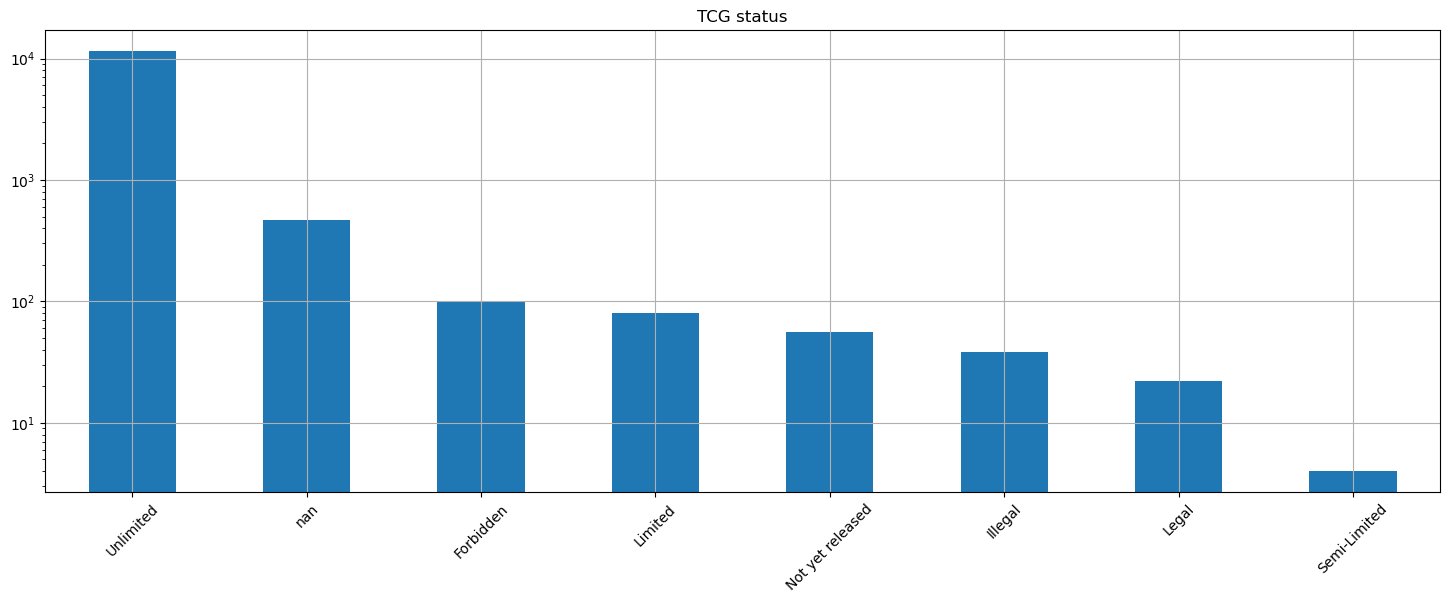

In [93]:
full_df['TCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [94]:
# Remove unlimited
tcg_crosstab = pd.crosstab(full_df['Card type'], full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab

TCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited
Card type,,,,,,
Monster Card,64,35,22,44,23,2
Spell Card,26,2,0,34,25,1
Trap Card,10,1,0,2,8,1


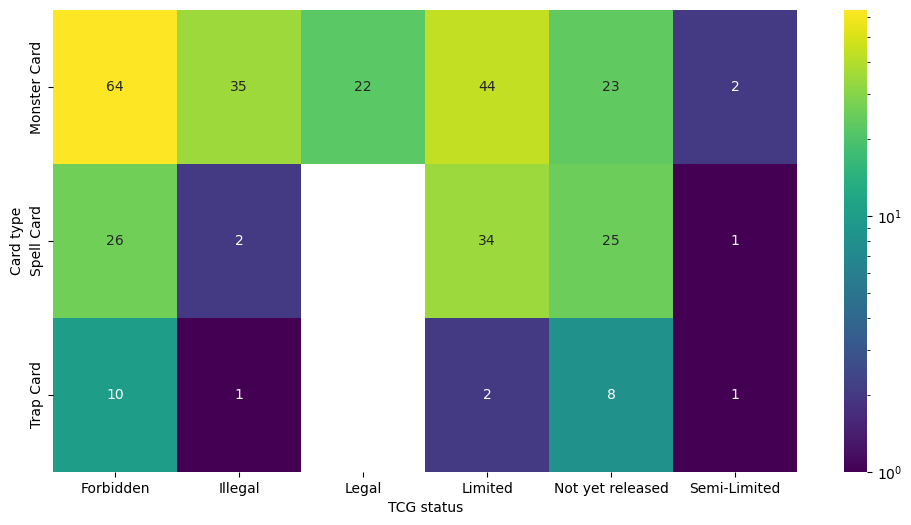

In [95]:
plt.figure(figsize = (12,6))
sns.heatmap(tcg_crosstab[tcg_crosstab>0], annot=True, fmt="g", cmap='viridis', norm=mc.LogNorm())
plt.show()

#### By monster type

In [96]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(full_df['Monster type'], full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab_b

TCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited
Monster type,,,,,,
Aqua,1,0,2,1,0,0
Beast,0,3,1,2,0,0
Beast-Warrior,2,3,0,2,0,0
Cyberse,2,0,1,1,1,0
Dinosaur,0,0,1,2,0,0
Divine-Beast,0,3,0,0,0,0
Dragon,11,3,1,7,2,0
Fairy,3,4,3,2,7,0
Fiend,5,2,4,3,0,0


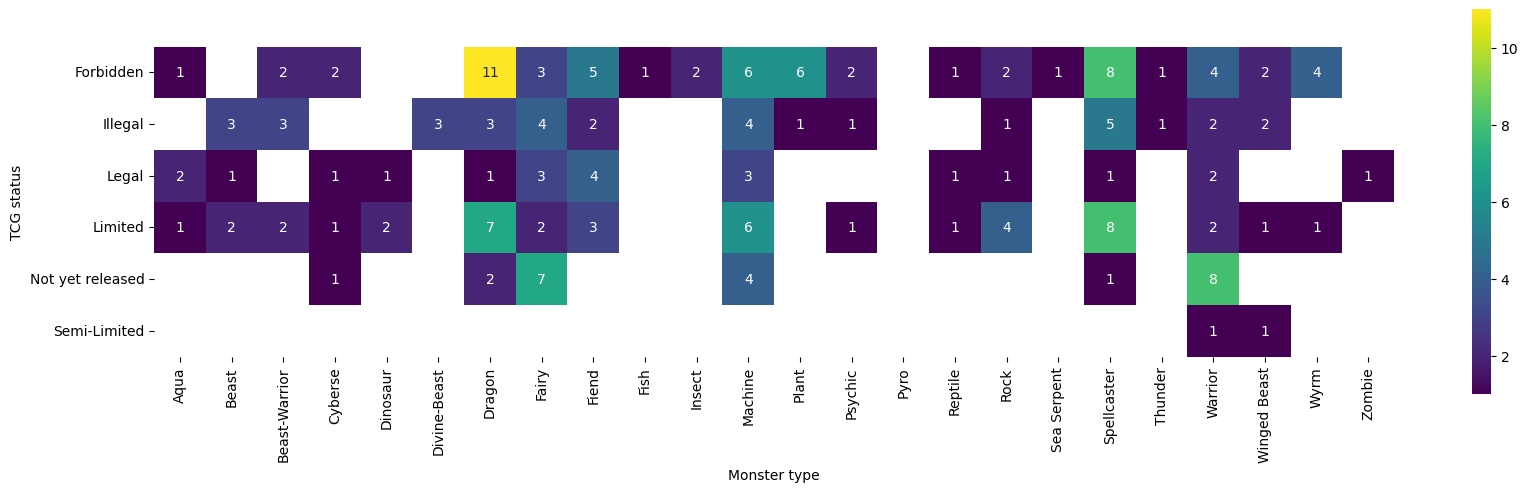

In [97]:
plt.figure(figsize = (20,5))
sns.heatmap(tcg_crosstab_b[tcg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [98]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['TCG status'], margins = True)
tcg_crosstab_c

TCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited,Unlimited,All
Archseries,,,,,,,,
-Eyes Dragon,1,0,0,0,0,0,0,1
Adventurer Token (series),0,0,0,0,0,0,2,2
Amazoness,0,0,0,0,0,0,1,1
Ancient Gear,0,0,1,0,0,0,0,1
Attribute Knight,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
Zexal,1,0,0,0,0,0,0,1
Zoodiac,3,0,0,1,0,0,0,4
roid,0,0,0,1,0,0,0,1


### OCG status

In [99]:
print('Total number of OCG status:', full_df['OCG status'].nunique())

Total number of OCG status: 7


In [100]:
full_df.groupby('OCG status', dropna=False).nunique()

,Name,Password,Card type,Property,Effect type,Archseries,TCG status,Page name,Artwork,Modification date,...,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows
OCG status,,,,,,,,,,,,,,,,,,,,,
Forbidden,87,87,3,6,40,45,3,87,1,87,...,5,3,6,19,11,24,21,3,4,8
Illegal,32,1,3,2,8,8,1,32,0,32,...,6,1,6,12,8,14,15,2,2,2
Legal,39,0,1,0,0,24,1,39,1,39,...,2,0,6,17,7,8,8,0,0,0
Limited,76,76,3,6,34,43,3,76,3,76,...,6,2,6,15,9,21,21,3,3,3
Not yet released,3,1,1,0,2,2,1,3,0,3,...,2,0,3,3,3,3,3,0,0,0
Semi-Limited,23,23,2,4,17,14,4,23,2,23,...,2,1,4,6,4,8,6,0,2,2
Unlimited,11960,11935,3,9,355,1168,5,11966,3,11846,...,7,6,7,25,14,81,76,13,6,60
NaN,38,25,3,6,15,5,3,38,0,38,...,5,1,6,13,6,12,14,0,1,1


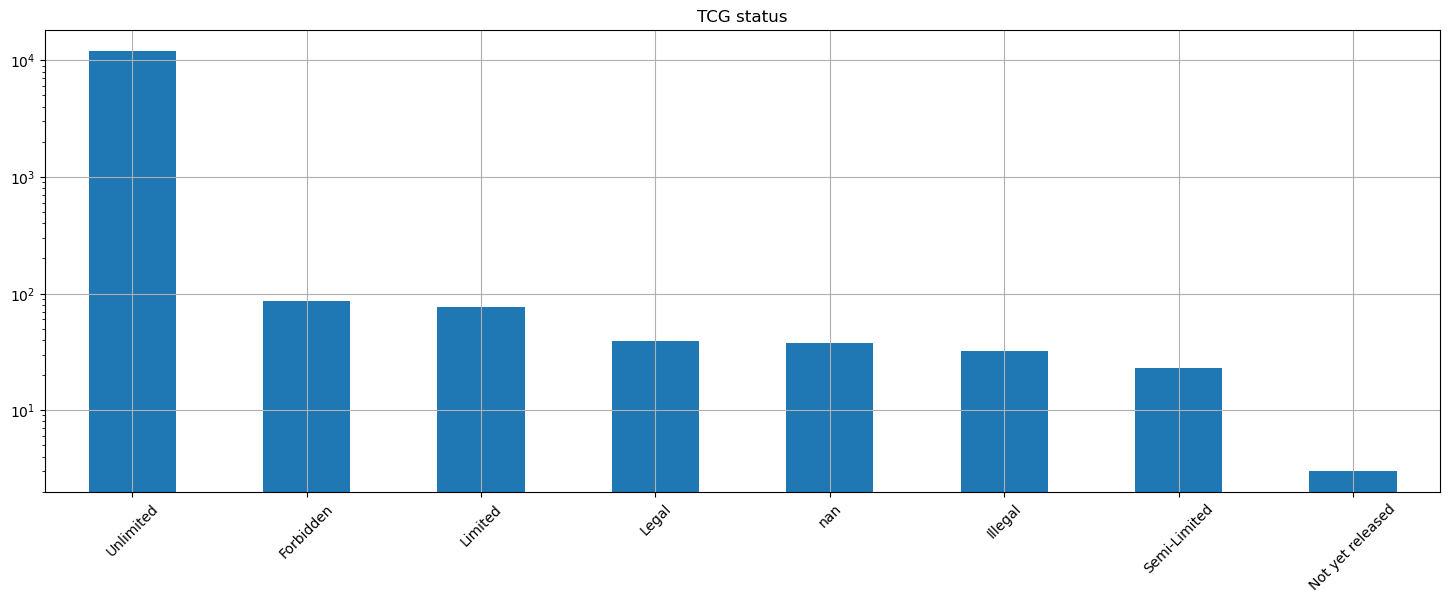

In [101]:
full_df['OCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [102]:
# Remove unlimited
ocg_crosstab = pd.crosstab(full_df['Card type'], full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab

OCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited
Card type,,,,,,
Monster Card,56,30,39,44,3,8
Spell Card,21,1,0,29,0,15
Trap Card,10,1,0,3,0,0


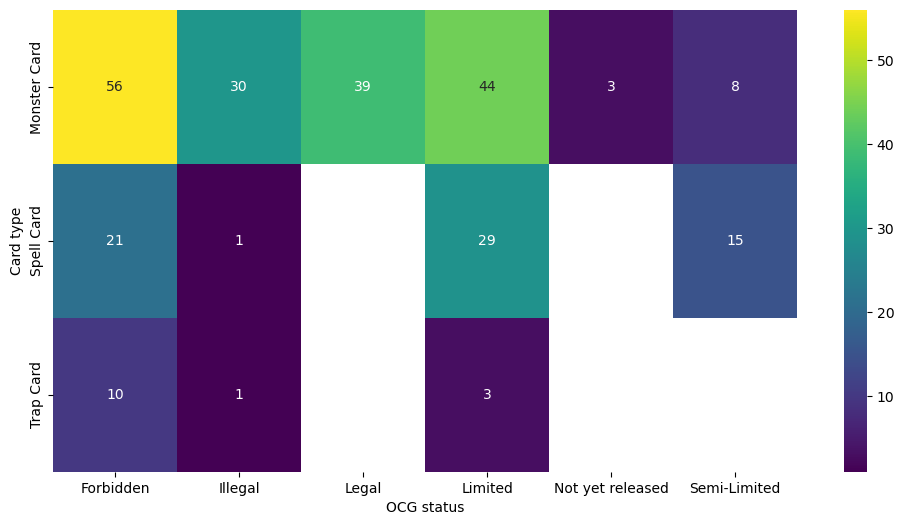

In [103]:
plt.figure(figsize = (12,6))
sns.heatmap(ocg_crosstab[ocg_crosstab>0], annot=True, fmt="g", cmap='viridis')
plt.show()

#### By monster type

In [104]:
ocg_crosstab_b = pd.crosstab(full_df['Monster type'], full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab_b

OCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited
Monster type,,,,,,
Aqua,3,0,2,1,0,2
Beast,1,2,4,0,0,0
Beast-Warrior,3,2,0,1,0,1
Creator God,0,0,0,0,0,0
Cyberse,2,0,2,1,0,0
Dinosaur,0,0,1,1,0,0
Divine-Beast,0,3,0,0,0,0
Dragon,9,3,1,6,1,0
Fairy,2,3,4,4,0,0


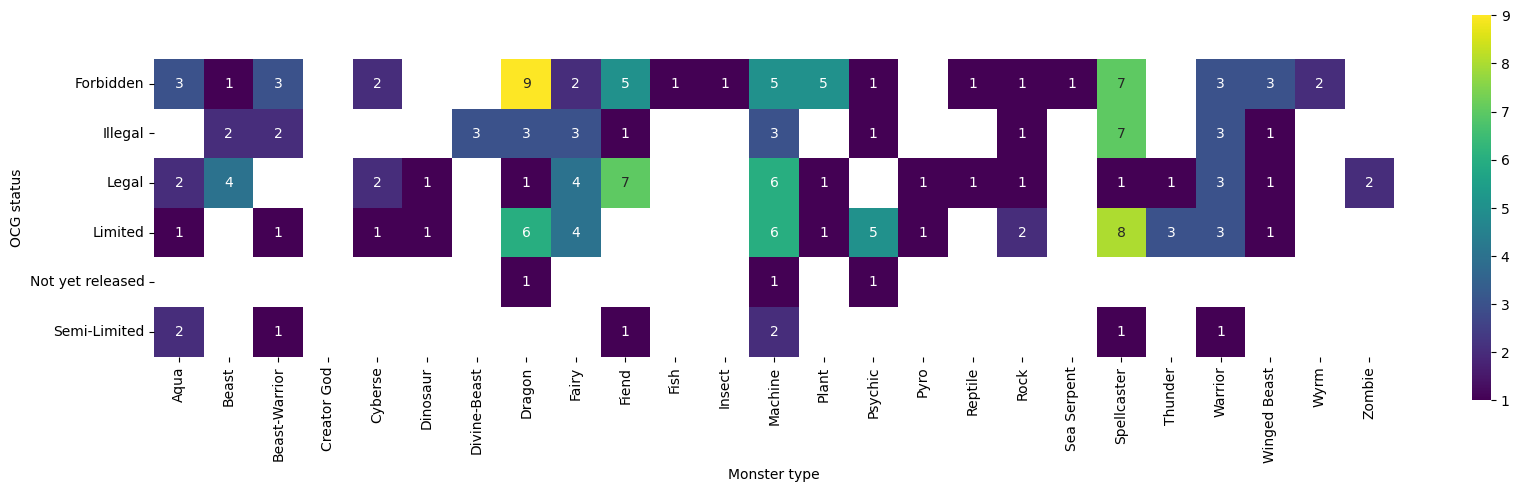

In [105]:
plt.figure(figsize = (20,5))
sns.heatmap(ocg_crosstab_b[ocg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [106]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['OCG status'], margins = True)
ocg_crosstab_c

OCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited,All
Archseries,,,,,,,
-Eyes Dragon,1,0,0,0,0,0,1
Adventurer Token (series),1,0,0,0,0,1,2
Amazoness,1,0,0,0,0,0,1
Ancient Gear,0,0,1,0,0,0,1
Attribute Knight,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...
Zombie counterpart,0,0,1,0,0,0,1
Zoodiac,2,0,0,2,0,0,4
roid,0,0,0,1,0,0,1


### TCG vs. OCG status

In [107]:
cg_crosstab = pd.crosstab(full_df['OCG status'],full_df['TCG status'], dropna=False, margins = False)
cg_crosstab

TCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited,Unlimited
OCG status,,,,,,,
Forbidden,70,0,0,4,0,0,13
Illegal,0,26,0,0,0,0,0
Legal,0,0,22,0,0,0,0
Limited,8,0,0,37,0,0,30
Not yet released,0,0,0,0,0,0,1
Semi-Limited,1,0,0,4,0,2,16
Unlimited,21,0,0,35,55,2,11413


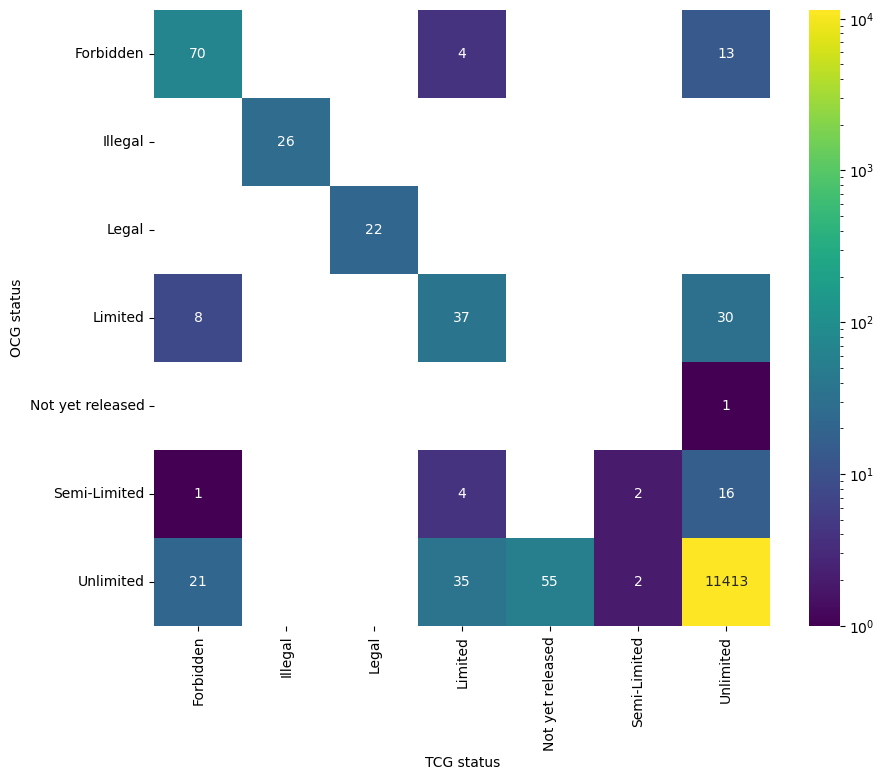

In [108]:
plt.figure(figsize = (10,8))
sns.heatmap(cg_crosstab[cg_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

# Extras

## Not yet released

In [109]:
full_df.loc[full_df['OCG status'] == 'Not yet released'].loc[full_df['TCG status'] == 'Not yet released']

,Name,Password,Card type,Property,Effect type,Archseries,TCG status,OCG status,Page name,Artwork,...,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows


# Epilogue

In [110]:
footer()

<div align='right'>
    Execution completed 16/01/2023 17:39 UTC
</div>

## HTML export

In [111]:
# Save notebook on disck before generating HTML report
save_notebook()

Notebook saved to disk


In [112]:
! jupyter nbconvert Cards.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

[NbConvertApp] Converting notebook Cards.ipynb to HTML
[NbConvertApp] Writing 3973840 bytes to ../Cards.html


## Git

In [113]:
! git add "../*[Cc]ards*"

In [114]:
! git commit -m {"'Cards update-" + timestamp.strftime("%d%m%Y")+"'"}

[main fd2a49e] Cards update-16012023
 4 files changed, 30233 insertions(+), 4895 deletions(-)
 create mode 100644 Data/All_cards_1673889238.csv
 create mode 100644 Data/All_cards_1673890265.csv
